# <U>**TRABAJO FINAL - CODERHOUSE - AEROLINEA**</U>
## PABLO PEROTTI
### **_COMISION 60940_**

## Análisis de Clientes de Aerolíneas Chinas Basado en el Modelo LRFMC

### Resumen

En un mercado aéreo altamente competitivo, entender y satisfacer las necesidades de los clientes es crucial para el éxito y crecimiento de una aerolínea. Este análisis utiliza el modelo LRFMC (Loyalty, Recency, Frequency, Monetary, Cabin) para segmentar a los clientes de una aerolínea china, con el fin de identificar patrones de comportamiento y mejorar la oferta de servicios.

El estudio se basa en datos que abarcan diferentes aspectos del comportamiento del cliente, incluyendo la lealtad, la recencia de las compras, la frecuencia de vuelo, el valor monetario de los viajes y el nivel de cabina. La información proporcionada permitirá una mejor comprensión de las necesidades y preferencias de los clientes para personalizar las estrategias de marketing y mejorar la experiencia general.

### Objetivo

El objetivo principal de este análisis es segmentar a los clientes utilizando el modelo LRFMC para identificar grupos clave y mejorar la satisfacción del cliente a través de estrategias personalizadas. Este enfoque nos ayudará a comprender mejor los comportamientos de los clientes y a ajustar nuestras ofertas y servicios para satisfacer sus expectativas.

### Contexto Comercial

La industria aérea en China es una de las más dinámicas y de rápido crecimiento a nivel mundial. Para destacar en este mercado, es esencial ofrecer servicios que no solo cumplan, sino que superen las expectativas de los clientes. El análisis de datos de clientes proporciona una visión profunda de sus comportamientos y preferencias, lo que permite a la aerolínea ajustar sus estrategias de manera más efectiva.

### Desafío Comercial

El análisis se centra en responder las siguientes preguntas clave utilizando el modelo LRFMC:

	1.	¿Cuál es el nivel de lealtad de nuestros clientes? Medido por el tiempo transcurrido desde la inscripción en el programa de fidelización hasta el final del período de observación.
	2.	¿Cómo varía la recencia entre los clientes? Evaluado por el tiempo desde el último vuelo hasta el final del período de observación.
	3.	¿Cuál es la frecuencia de vuelo de nuestros clientes? Determinada por el número total de vuelos realizados en el período de observación.
	4.	¿Qué valor monetario representan nuestros clientes? Medido por la suma total de kilómetros de vuelo durante el período de observación.
	5.	¿Cómo influye el nivel de cabina en la satisfacción del cliente? Evaluado a través del descuento promedio aplicado a los asientos durante el período de observación.

# Segmentación de Clientes de Aerolíneas Basada en el Modelo LRFMC
***

La segmentación de clientes se define como el proceso mediante el cual los clientes de una empresa se dividen en grupos según su comportamiento de compra y características. La segmentación puede basarse en atributos demográficos, psicográficos, geográficos y conductuales del cliente. Los atributos conductuales incluyen patrones de compra pasados, como la última compra y la frecuencia de compra. El objetivo de este proyecto es la categorización de los registros de clientes en varios grupos en el contexto de la aviación Business-to-Customer (B2C), utilizando análisis de clustering. Esto se logra primero utilizando el modelo de valor de vida del cliente Longitud, Recencia, Frecuencia y Monetario (LRFM), que puntúa a los clientes según cuatro atributos: la duración de la relación con la empresa (L), la recencia de la última transacción (R), la frecuencia de compra (F), el valor monetario del cliente (M) y la cabina o el espacio del pasajero (C). Luego, el proyecto implementa un modelo de clustering utilizando el algoritmo k-means++, donde los registros de los clientes se segmentan en función de sus respectivos valores LRFMC. Además, el modelo propuesto se integra con una fase de ajuste de hiperparámetros, donde la selección del número de clusters se realiza utilizando el Método del Codo (Elbow Method). Finalmente, se visualizan y discuten los resultados del clustering. A través de la segmentación de clientes, se podría distinguir a los clientes de alto valor de los clientes sin valor.

El conjunto de datos utilizado por el proyecto se adjuntará en la misma carpeta que este archivo.

Objetivo:

	•	Categorizar a los clientes en varios grupos según el modelo de valor de vida del cliente LRFMC.
	•	Crear recomendaciones de acciones y enfoques para los clientes.
	•	Aprender sobre clustering de big data.

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
#Archivo de datos
vuelo = pd.read_csv('https://raw.githubusercontent.com/PabloPerotti/DATASETS/main/flight.csv')
vuelo.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
vuelo.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [4]:
# Renombrar la columna
vuelo.rename(columns={'MEMBER_NO': 'ID'}, inplace=True)

In [5]:
# Convierto todos los nombres de las columnas a minúsculas
vuelo.columns = vuelo.columns.str.lower()

## 1. Comprensión de Datos y Limpieza de Datos

### 1.1. Informacion General

In [6]:
# Forma del conjunto de datos.
vuelo.shape

(62988, 23)

# Descripción de los elementos de la tabla

| Campo  |   Descripción  |
|---|---|
| id |  |
| ffp_date | Fecha de inscripción al programa de viajero frecuente |
| first_flight_date | Fecha del primer vuelo |
| gender | Género del pasajero (Male or Female) |
| fft_tier | Nivel del programa de viajero frecuente | 
| work_city | Ciudad de origen |
| work_province | provincia de origen |
| work_country | pais de origen |
| age | edad |
| load_time | Fecha de recolección de datos|
| flight_count | Número de vuelos del cliente |
| bp_sum | Plan de viaje |
| sum_yr_1 | Ingresos por tarifas |
| sum_yr_2 | Precios de pasajes |
| seg_km_sum | Distancia total (km) de vuelos realizados |
| last_flight_date | Fecha del último vuelo |
| last_to_end | Intervalo de tiempo entre el último vuelo y la última reserva de vuelo |
| avg_interval | Promedio del intervalo de tiempo |
| max_interval | Intervalo de tiempo máximo |
| exchange_count | Número de canjes |
| avg_discount | Descuento promedio que obtiene el cliente |
| points_sum | Número de puntos que obtiene el cliente |
| point_notflight' | Puntos no utilizados por los miembros |

In [7]:
# Obtengo el tipo de datos y los valores nulos para cada columna
vuelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

Varias columnas tienen valores nulos: `gender`, `work_city`, `work_province`, `work_country`, `age`, `sum_yr_1`, and `sum_yr_2`.

Varias columnas necesitan ser ajustadas a sus tipos de datos correspondientes: `ffp_date`, `first_flight_date`, `load_time`, `last_flight_date` --> formato fecha

### 1.2. Conversion del Tipo de Datos de las Columnas

In [8]:
# Convierto el tipo de dato de algunas columnas a datetime
vuelo['ffp_date'] = pd.to_datetime(vuelo['ffp_date'])
vuelo['first_flight_date'] = pd.to_datetime(vuelo['first_flight_date'])
vuelo['load_time'] = pd.to_datetime(vuelo['load_time'])

In [9]:
vuelo.head()

,id,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


Hay un error al intentar convertir la columna last_flight_date en datetime, ya que resulta que hay varios datos con diferentes formatos de fecha y fechas completamente incorrectas.
El error tambien me dice que  2014/2/29  0:00:00 no existe en el calendario (2014 no es un año bisiesto), entonces lo cambiamos a la fecha siguiente, es decir, 2014/3/1 o 3/1/2014. Luego podemos convertirlo usando una sintaxis similar a la que hemos utilizado para las otras columnas.

In [10]:
# Dado que 2014 no es un año bisiesto, convertimos 2014/2/29 a 2014/3/1
vuelo.loc[vuelo['last_flight_date'] == '2014/2/29  0:00:00', 'last_flight_date'] = '3/1/2014'

# Luego de solucionar la fecha inexistente convierto a columna last_flight_date a datetime
vuelo['last_flight_date'] = pd.to_datetime(vuelo['last_flight_date'])

### 1.3. Manejo de Valores Faltantes

In [11]:
# Imprimo el número total de filas que tienen al menos un valor faltante en el DataFrame.
print('Filas con Valores Faltantes : ', vuelo.isna().any(axis=1).sum(), 'rows')

# Imprimo el porcentaje de filas que tienen al menos un valor faltante en relación con el total de filas del DataFrame
print('en porcentaje : {:.2f}%'.format((vuelo.isna().any(axis=1).sum() / vuelo.shape[0]) * 100))

Filas con Valores Faltantes :  4733 rows
en porcentaje : 7.51%


Dado que las filas con valores faltantes son más del 5%, debemos revisar cada columna antes de decidir la manera más adecuada de manejar esto.

In [12]:
# Verifico los valores faltantes en cada columna
vuelo.isna().sum()

id                      0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

Las columnas work_city y work_province tienen la mayor cantidad de valores faltantes. Dado que nuestro objetivo aquí es agrupar clientes, no necesitamos estas columnas, por lo tanto, podemos simplemente eliminarlas.

In [13]:
# Relleno los valores faltantes en work_city y work_province con ‘Unknown’
vuelo[['work_city', 'work_province']] = vuelo[['work_city', 'work_province']].fillna('Unknown')

In [14]:
# Elimino los otros valores faltantes
vuelo = vuelo.dropna()

Hemos eliminado 1132 datos, que representan el 1.8% del conjunto de datos original.

### 1.4. Chequeo los valores duplicados

In [15]:
vuelo.duplicated().sum()

0

In [16]:
vuelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61856 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 61856 non-null  int64         
 1   ffp_date           61856 non-null  datetime64[ns]
 2   first_flight_date  61856 non-null  datetime64[ns]
 3   gender             61856 non-null  object        
 4   ffp_tier           61856 non-null  int64         
 5   work_city          61856 non-null  object        
 6   work_province      61856 non-null  object        
 7   work_country       61856 non-null  object        
 8   age                61856 non-null  float64       
 9   load_time          61856 non-null  datetime64[ns]
 10  flight_count       61856 non-null  int64         
 11  bp_sum             61856 non-null  int64         
 12  sum_yr_1           61856 non-null  float64       
 13  sum_yr_2           61856 non-null  float64       
 14  seg_km

¡Los datos han sido limpiados!

## 2. Exploratory Data Analysis

In [17]:
# Divido las columnas en numéricas y categóricas
numericas = []
categoricas = []

for col in vuelo.columns:
    if (vuelo[col].dtypes == 'int64') | (vuelo[col].dtypes == 'float64'):
        numericas.append(col)
    else:
        categoricas.append(col)

### 2.1. Resumen estadístico

In [18]:
# El código elimina la primera columna de la lista de columnas numéricas, luego genera y transpone un resumen estadístico de las columnas numéricas restantes
# en el DataFrame vuelo. Esto te proporciona una visión detallada de las estadísticas descriptivas de las columnas numéricas restantes en un formato más fácil de leer.
numericas.pop(0)
# Resumen estadístico para columnas numericas
vuelo[numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
ffp_tier,61856.0,4.103450,0.375833,4.0,4.00000,4.000000,4.000000,6.0
age,61856.0,42.491108,9.887556,6.0,35.00000,41.000000,48.000000,110.0
flight_count,61856.0,11.964401,14.116064,2.0,3.00000,7.000000,15.000000,213.0
bp_sum,61856.0,11041.484739,16394.475910,0.0,2591.00000,5800.500000,12975.250000,505308.0
sum_yr_1,61856.0,5374.941563,8123.952605,0.0,1020.00000,2816.000000,6600.000000,239560.0
sum_yr_2,61856.0,5662.081399,8702.731851,0.0,833.00000,2826.500000,6912.000000,234188.0
seg_km_sum,61856.0,17303.810027,21040.271177,368.0,4866.75000,10183.000000,21497.500000,580717.0
last_to_end,61856.0,172.606942,181.234370,1.0,29.00000,105.000000,260.000000,731.0
avg_interval,61856.0,68.154935,77.684101,0.0,23.75000,45.000000,82.500000,728.0
max_interval,61856.0,167.461556,123.155015,0.0,81.00000,144.000000,229.000000,728.0


ffp_tier parece una columna con valores discretos a pesar de ser numérica, así que la movemos a la lista de categóricas.

In [19]:
# Muevo ffp_tier a la columna de categoricas 
numericas.pop(0)
vuelo['ffp_tier'] = vuelo['ffp_tier'].astype('object')
categoricas.append('ffp_tier')

In [20]:
# Resumen estadístico para columnas categóricas
vuelo[categoricas].describe()

,ffp_date,first_flight_date,gender,work_city,work_province,work_country,load_time,last_flight_date,ffp_tier
count,61856,61856,61856,61856,61856,61856,61856,61856,61856.0
unique,3067,3405,2,3199,1154,117,1,730,3.0
top,2011-01-13 00:00:00,2013-02-16 00:00:00,Male,guangzhou,guangdong,CN,2014-03-31 00:00:00,2014-03-31 00:00:00,4.0
freq,183,92,47298,9324,17357,56733,61856,956,56957.0
first,2004-11-01 00:00:00,1905-12-31 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,2012-04-01 00:00:00,NaN
last,2013-03-31 00:00:00,2015-05-30 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,2014-03-31 00:00:00,NaN


### 2.2. Analisis Univariado

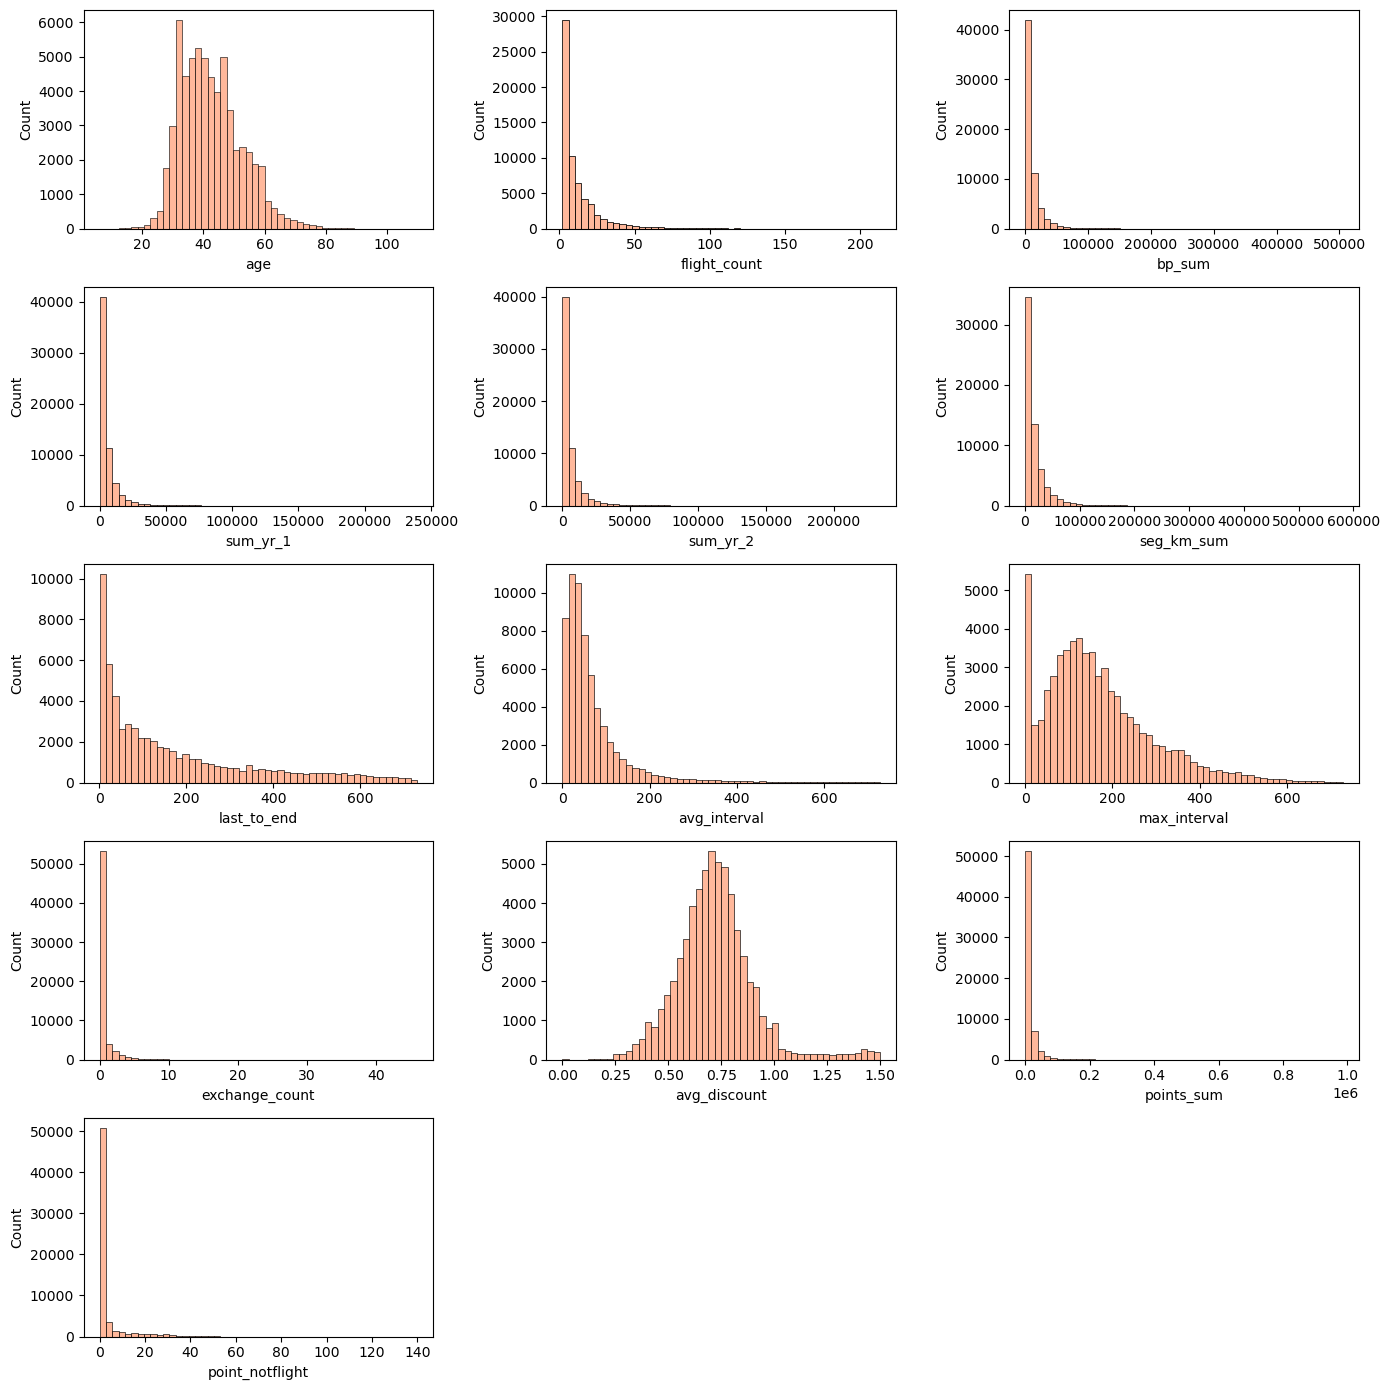

In [21]:
# Dibujo gráfico de distribución
plt.figure(figsize = (14, 14))

for i in range(len(numericas)):
    plt.subplot(5, 3, i + 1)
    sns.histplot(data = vuelo, x = numericas[i], color='lightsalmon', bins = 50)
    plt.xlabel(numericas[i])
    plt.tight_layout()


Casi todas las columnas están sesgadas a la derecha, solo avg-discount tiene una distribución normal.

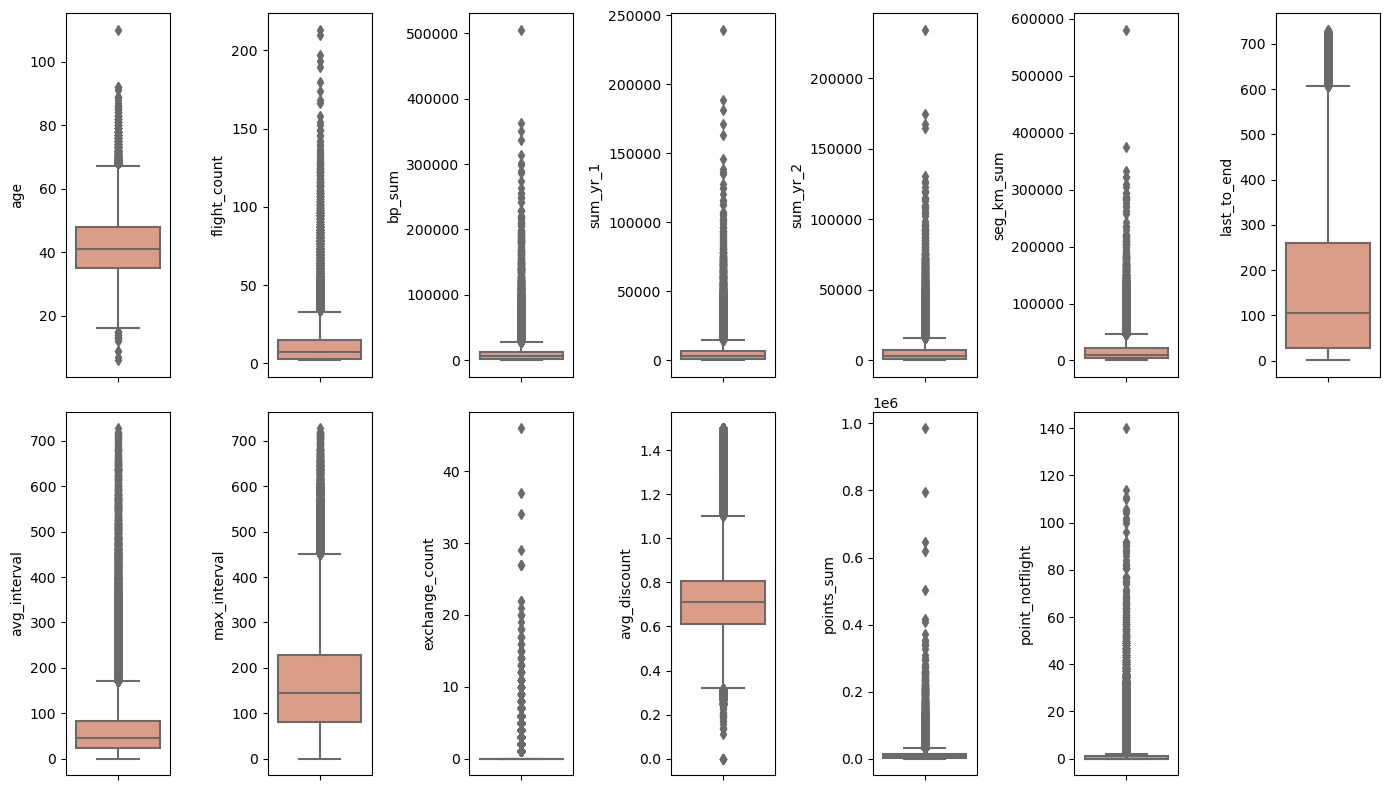

In [22]:
# Dibujo un diagrama de caja para identificar valores outliers
plt.figure(figsize = (14, 8))

for i in range(len(numericas)):
    plt.subplot(2, len(numericas)//2 + 1, i+1)
    sns.boxplot(y = vuelo[numericas[i]], color = 'darksalmon')
    plt.tight_layout()


Todas las columnas tienen una cantidad considerable de valores outliers.

### 2.3. Analisis Bivariado 

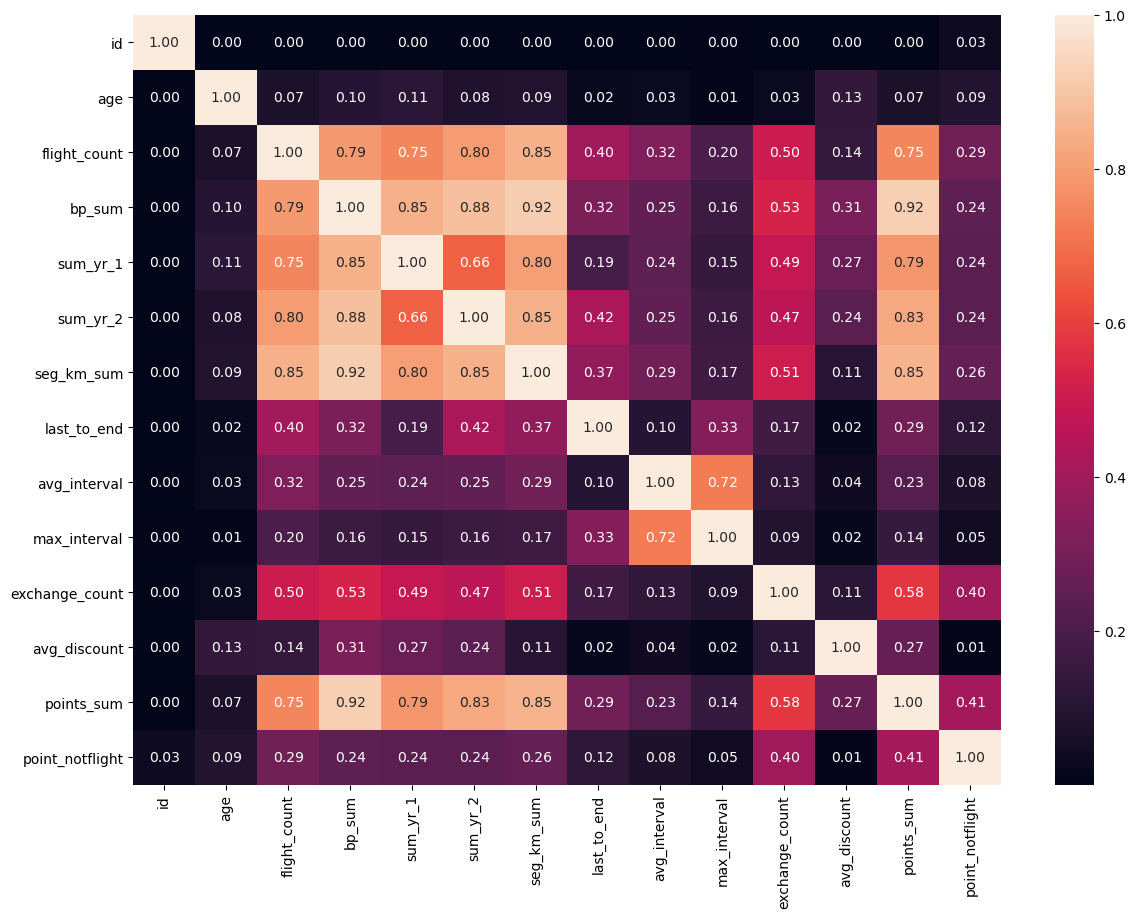

In [23]:
# heatmap grafico de correlacion
corr = vuelo.corr().abs()

plt.figure(figsize = (14,10))
sns.heatmap(corr, annot = True, fmt='.2f')
plt.show()

Las columnas flight_count, bp_sum, sum_yr_1, sum_yr_2 y seg_km_sum están altamente correlacionadas entre sí, lo cual es lógico. A medida que un cliente realiza más compras o vuelos, la distancia total de los vuelos aumenta y, por lo tanto, también lo hacen los ingresos por tarifas.
Por otro lado, points_sum, o el total de puntos acumulados por el cliente, se basa en las compras realizadas (bp_sum). Cuantas más compras realiza el cliente, más puntos acumula.

### 2.4. Análisis en Profundidad

**¿Cuáles son los 10 principales países de origen de los clientes?** 

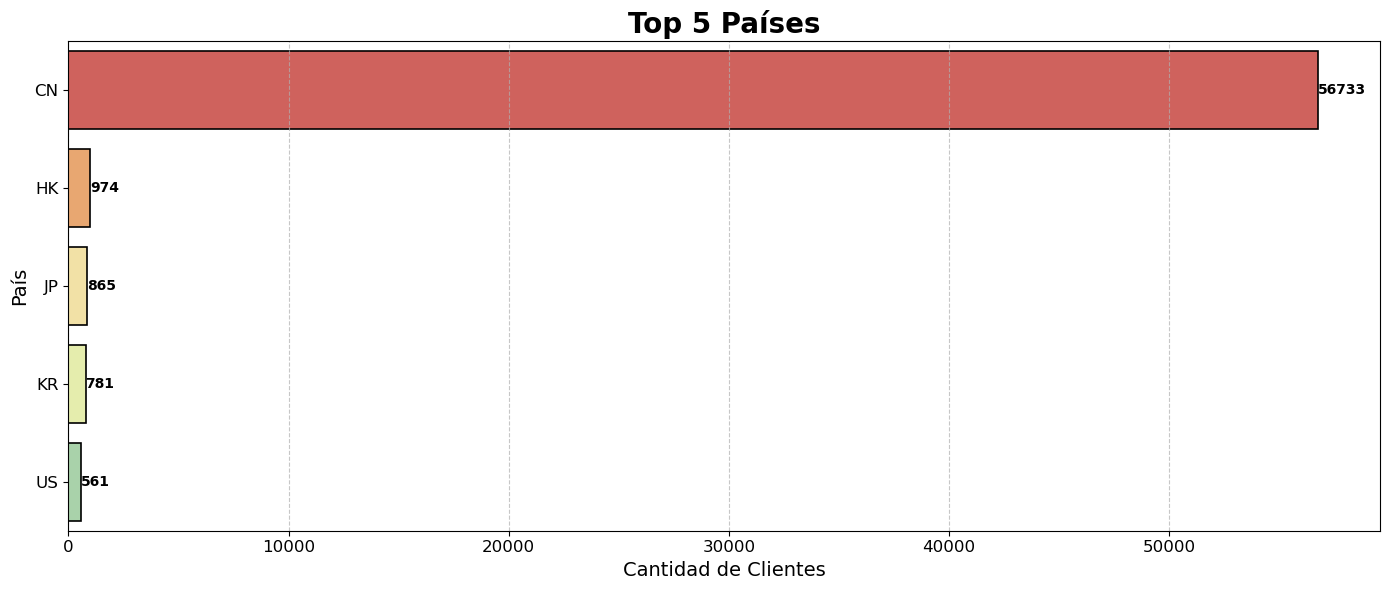

In [24]:
# Este código genera un gráfico de barras que muestra los 5 países principales de los clientes según su cantidad en el DataFrame vuelo.
toppaises = vuelo.groupby('work_country').size().sort_values(ascending = False).reset_index()
top5paises = toppaises.head(5)

plt.figure(figsize=(14, 6))

# Creo el gráfico de barras
ax = sns.barplot(x = top5paises[0], y = 'work_country', data = top5paises, palette = sns.color_palette("Spectral"))

# Añado etiquetas de barra con color
plt.bar_label(ax.containers[0], color = 'black', fontweight = 'bold')

# Mejoro el aspecto del gráfico
plt.title('Top 5 Países', fontsize = 20, fontweight = 'bold')
plt.xlabel('Cantidad de Clientes', fontsize = 14, color = 'black')
plt.ylabel('País', fontsize = 14, color = 'black')

# Mejoro la apariencia de las barras
for bar in ax.patches:
    bar.set_edgecolor('black')  # Añadir borde a las barras
    bar.set_linewidth(1.2)      # Ajustar el grosor del borde

# Añado una rejilla horizontal para facilitar la lectura
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajusto el tamaño de la fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajusto el diseño para evitar superposiciones
plt.tight_layout()

plt.show()

La mayoría de los clientes provienen de China (91.71%), considerando que este conjunto de datos proviene de una aerolínea china, seguido por su país vecino, Hong Kong, Corea del Sur, Japón y Estados Unidos.

**¿Cuál es la proporción de clientes locales e internacionales?**

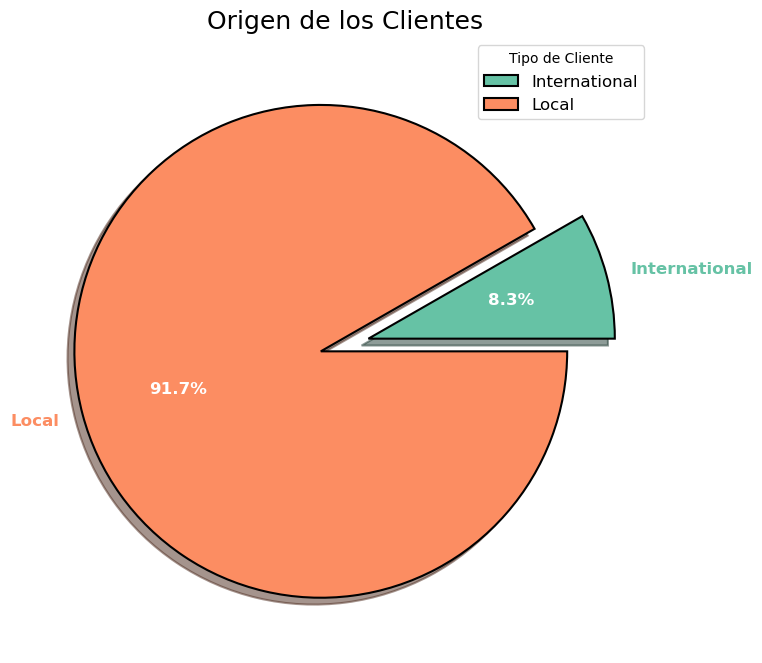

In [25]:
# Agrupo el DataFrame vuelo por la columna work_country, cuenta el número de clientes en cada país, ordena los países por el número de clientes en orden 
# descendente y convierte el resultado en un DataFrame.
toppaises = vuelo.groupby('work_country').size().sort_values(ascending = False).reset_index()

# Reemplazo ‘CN’ con ‘Local’ y el resto con ‘International
toppaises['work_country'] = np.where(toppaises['work_country'] == 'CN', 'Local', 'International')

# Agrupo clientes por local e internacional
toppaises = toppaises.groupby(['work_country'])[0].sum()

# Creo un pie chart
subset = pd.DataFrame(toppaises).reset_index()
plt.figure(figsize = (10, 8))
patches, texts, pcts = plt.pie(
    x = subset[0], 
    labels = subset['work_country'], 
    explode = (0.1, 0.1),  # Separo un poco los segmentos para mejor visualización
    autopct = '%1.1f%%', 
    colors = sns.color_palette("Set2"),  # Uso una paleta de colores diferente
    wedgeprops = {'edgecolor': 'black', 'linewidth': 1.5},  # Añado un borde a los segmentos
    shadow = True,  # Agrego sombra
    textprops = {'fontsize': 12}  # Ajusto el tamaño de la fuente
)

# Configurar el color del texto de cada segmento para que coincida con el color de fondo del segmento
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color = 'white', fontweight = 'bold')
plt.setp(texts, fontweight = 600)
plt.title("Origen de los Clientes", fontsize = 18)

# Añadir una leyenda
plt.legend(title = "Tipo de Cliente", loc = "best", fontsize = 'large')

# Mostrar el gráfico
plt.show()

**¿De qué países provienen los 10 principales clientes internacionales?**

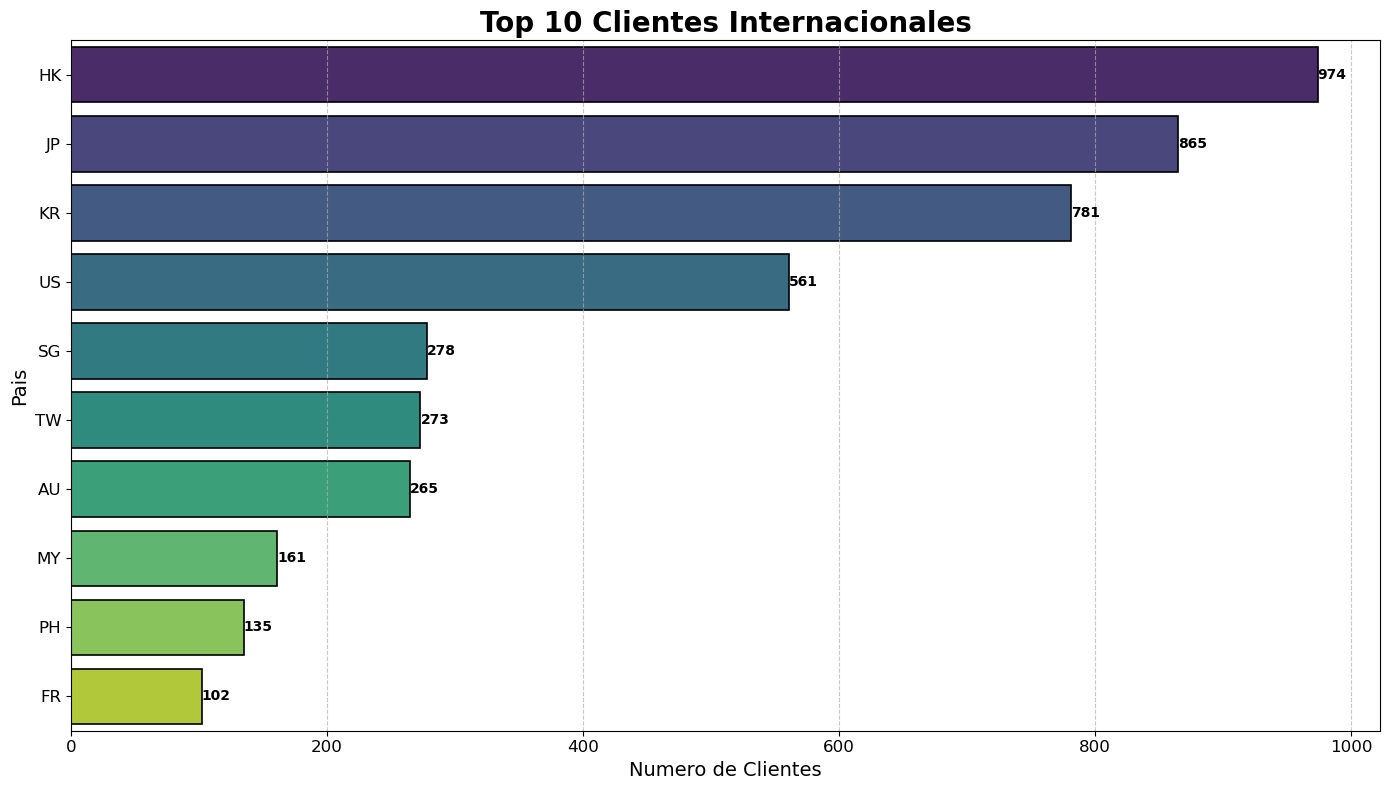

In [26]:
# Agrupo clientes internacionales por país
topinternational = vuelo[vuelo['work_country'] != 'CN'].groupby('work_country').size().sort_values(ascending = False).reset_index()

# Creo un gráfico de barras
plt.figure(figsize = (14, 8))
ax = sns.barplot(x = 0, y = 'work_country', data = topinternational.head(10), palette = 'viridis')

# Añado etiquetas de barra con color
plt.bar_label(ax.containers[0], color = 'black', fontweight = 'bold')

# Mejoro el aspecto del gráfico
plt.title('Top 10 Clientes Internacionales', fontsize = 20, fontweight = 'bold')
plt.xlabel('Numero de Clientes', fontsize = 14, color = 'black')
plt.ylabel('Pais', fontsize = 14, color = 'black')

# Mejoro la apariencia de las barras
for bar in ax.patches:
    bar.set_edgecolor('black')  # Añado borde a las barras
    bar.set_linewidth(1.2)      # Ajusto el grosor del borde

# Añado una rejilla horizontal para facilitar la lectura
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

# Ajusto el tamaño de la fuente de los ejes
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Muestro el gráfico
plt.tight_layout()
plt.show()

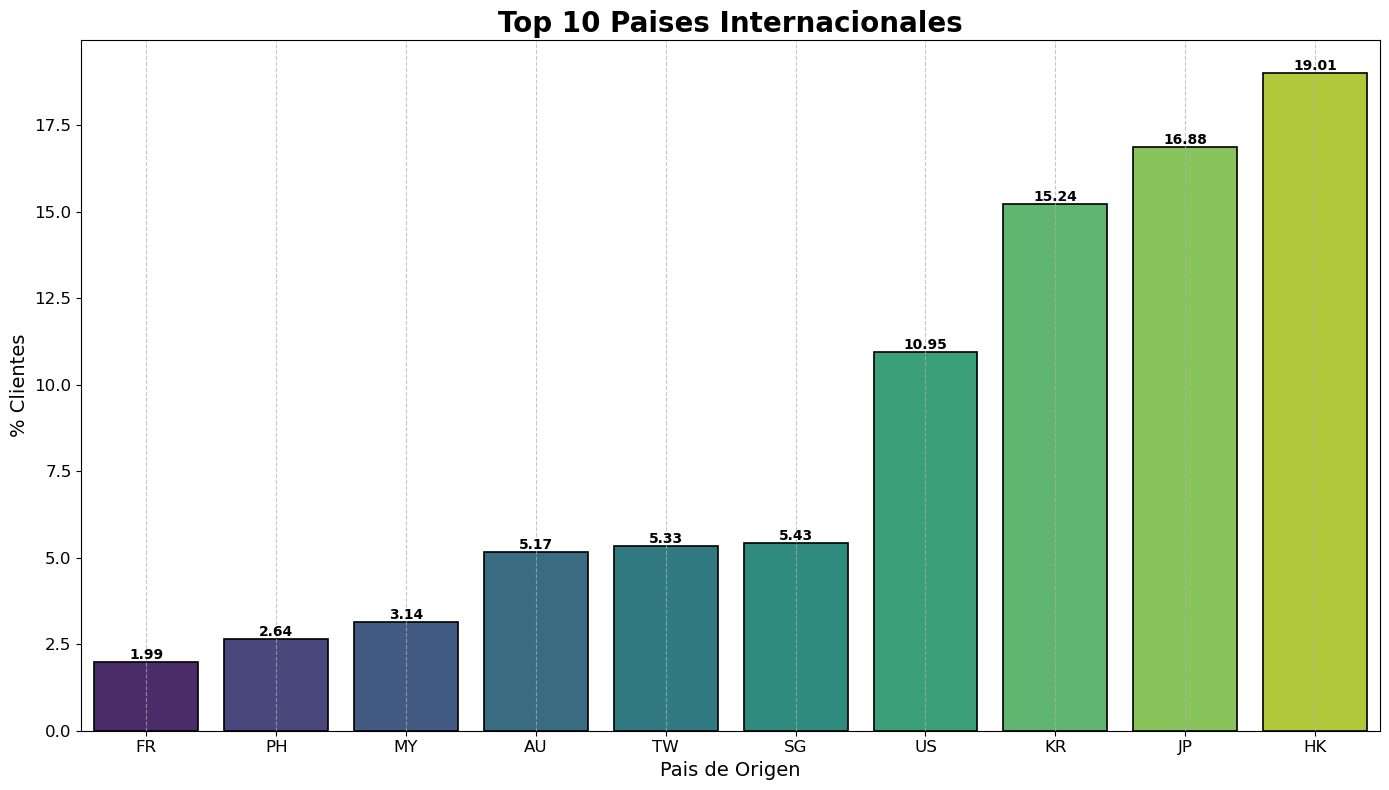

In [27]:
# Agrupo clientes internacionales por país y calculo el porcentaje
topinternational = vuelo[vuelo['work_country'] != 'CN'].groupby('work_country').size().sort_values(ascending = True).reset_index()
topinternational['%'] = np.round(topinternational[0] * 100 / topinternational[0].sum(), 2)

# Creo gráfico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(x = 'work_country', y = '%', data = topinternational.tail(10), palette = 'viridis')

# Añado etiquetas de barra con color
plt.bar_label(ax.containers[0], color = 'black', fontweight = 'bold')

# Mejoro el aspecto del gráfico
plt.title('Top 10 Paises Internacionales', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pais de Origen', fontsize = 14, color = 'black')
plt.ylabel('% Clientes', fontsize = 14, color = 'black')

# Mejoro la apariencia de las barras
for bar in ax.patches:
    bar.set_edgecolor('black')  # Añado borde a las barras
    bar.set_linewidth(1.2)      # Ajusto el grosor del borde

# Añado una rejilla horizontal para facilitar la lectura
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

# Ajusto el tamaño de la fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Muestro el gráfico
plt.tight_layout()
plt.show()

¿Cuáles son las 5 principales provincias locales de las que provienen los clientes?

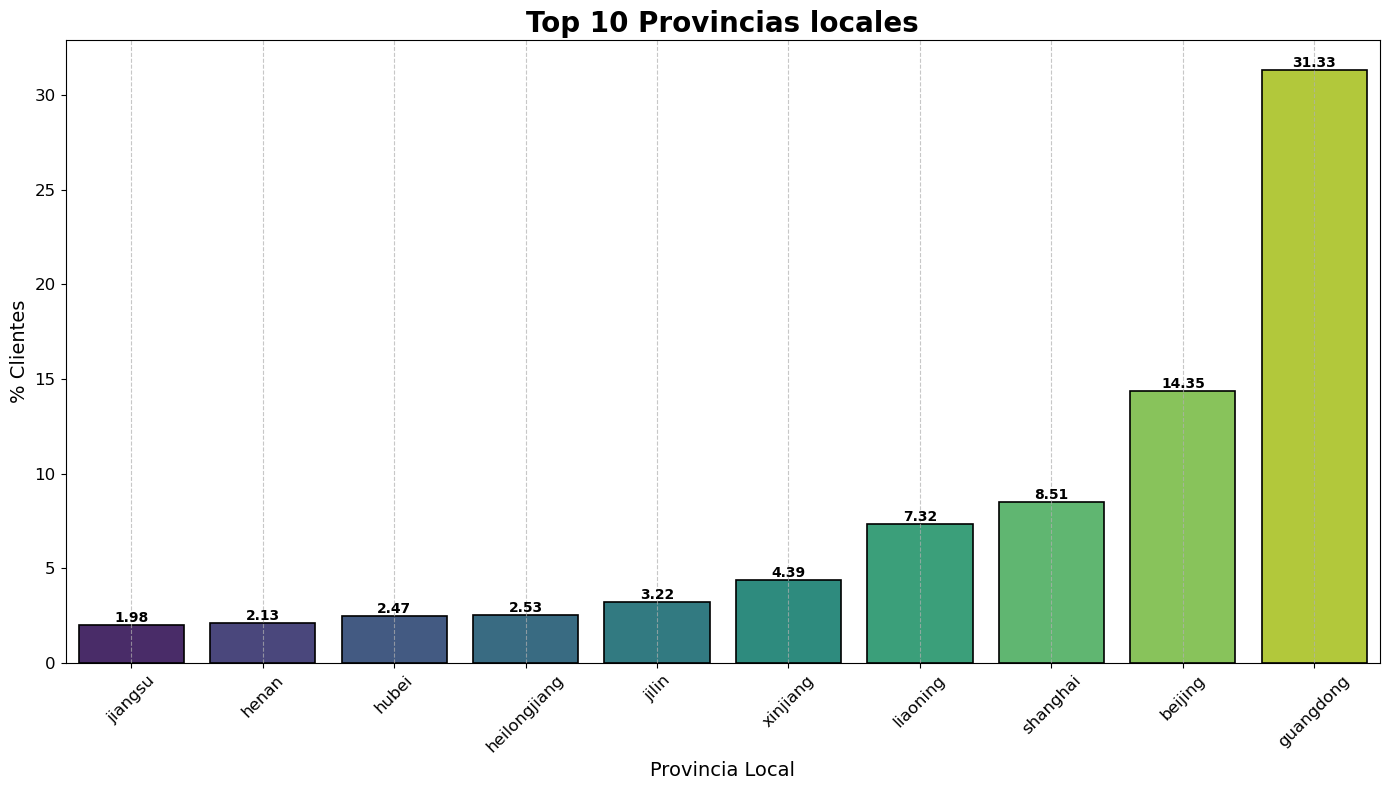

In [28]:
# Filtro clientes locales y elimino valores desconocidos
vuelolocal = vuelo[(vuelo['work_country'] == 'CN') & (vuelo['work_province'] != 'Unknown')]

# Limpio y formateo los nombres de las provincias
vuelolocal['work_province'] = vuelolocal['work_province'].str.replace(' ', '').str.lower() 

# Agrupo por provincia y calculo el porcentaje
topprovince = vuelolocal.groupby('work_province').size().sort_values(ascending = True).reset_index()
topprovince['%'] = np.round(topprovince[0] * 100 / topprovince[0].sum(), 2)
top10province = topprovince.tail(10)

# Creo gráfico de barras
plt.figure(figsize = (14, 8))
ax = sns.barplot(x = "work_province", y = "%", data=top10province, palette = "viridis")

# Añado etiquetas de barra con color
plt.bar_label(ax.containers[0], color = 'black', fontweight = 'bold')

# Mejoro el aspecto del gráfico
plt.title('Top 10 Provincias locales', fontsize = 20, fontweight = 'bold')
plt.xlabel('Provincia Local', fontsize = 14, color = 'black')
plt.ylabel('% Clientes', fontsize = 14, color = 'black')

# Mejoro la apariencia de las barras
for bar in ax.patches:
    bar.set_edgecolor('black')  # Añado borde a las barras
    bar.set_linewidth(1.2)      # Ajusto el grosor del borde

# Añado una rejilla horizontal para facilitar la lectura
plt.grid(axis='x', linestyle = '--', alpha = 0.7)

# Ajusto el tamaño de la fuente de los ejes
plt.xticks(fontsize = 12, rotation = 45)  # Roto las etiquetas para mejor legibilidad
plt.yticks(fontsize = 12)

# Muestro el gráfico
plt.tight_layout()
plt.show()


**¿Cuál es la proporción de Género y Nivel de Membresía (FFP Tier) de los Clientes**

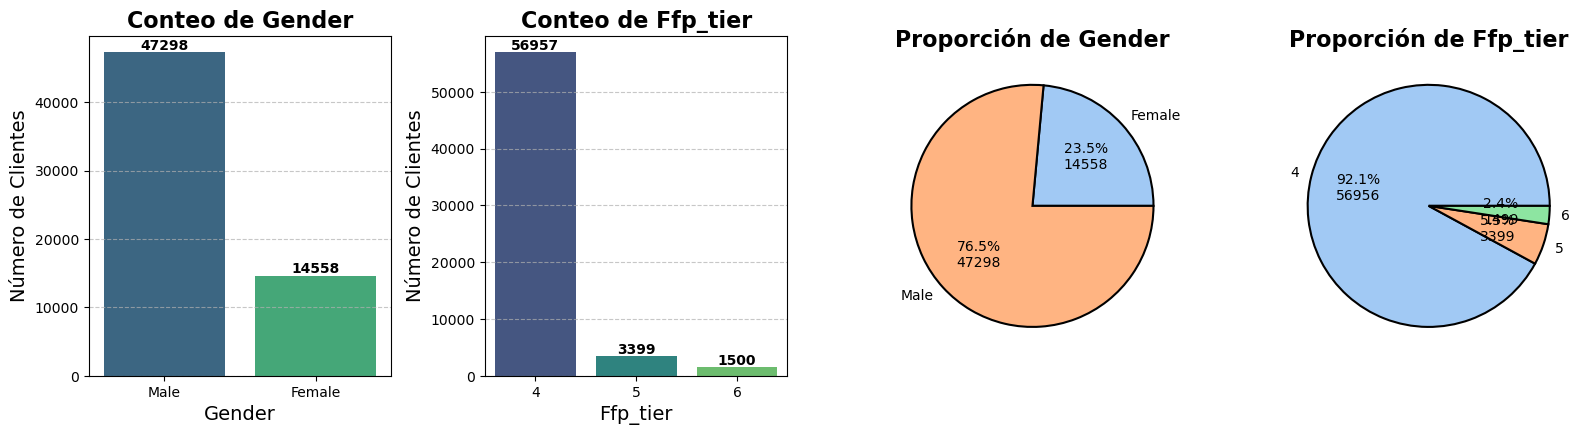

In [29]:
# Muestra gráficos de conteo para las columnas 'gender' y 'ffp_tier'
cols = ['gender', 'ffp_tier']

plt.figure(figsize=(16, 8))

# Gráfico de conteo para cada columna
for i in range(len(cols)):
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(x = vuelo[cols[i]], palette = 'viridis')
    plt.bar_label(ax.containers[0], color = 'black', fontweight = 'bold')
    plt.title(f'Conteo de {cols[i].capitalize()}', fontsize = 16, fontweight = 'bold')
    plt.xlabel(cols[i].capitalize(), fontsize = 14)
    plt.ylabel('Número de Clientes', fontsize = 14)
    plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Función para etiquetas en el gráfico circular
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return '{:.1f}%\n{:d}'.format(pct, absolute)

# Gráfico circular para cada columna
for i in range(len(cols)):
    plt.subplot(2, 4, i+3)
    subset = pd.DataFrame(vuelo.groupby(cols[i]).size()).reset_index()
    plt.pie(x = subset[0], labels = subset[cols[i]], autopct = lambda pct: func(pct, subset[0]),
            colors=sns.color_palette('pastel'), wedgeprops = {'linewidth': 1.5, 'edgecolor': 'black'})
    plt.title(f'Proporción de {cols[i].capitalize()}', fontsize = 16, fontweight = 'bold')

plt.tight_layout()
plt.show()

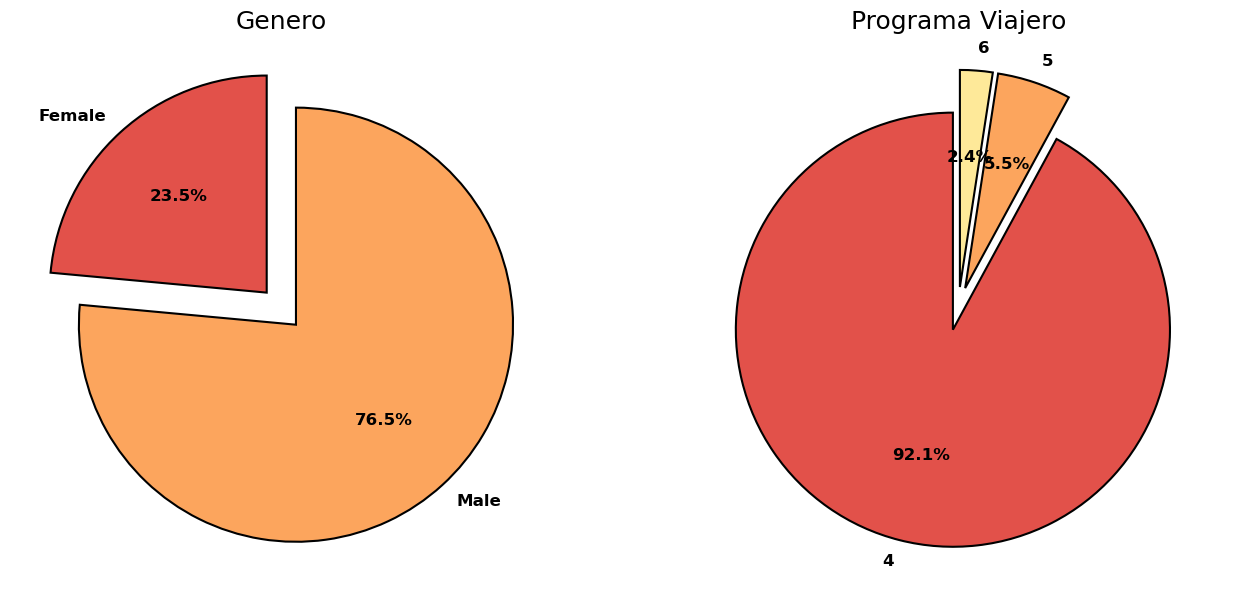

In [30]:
# Configuro el tamaño de la figura
plt.figure(figsize = (14, 6))

# Creo un gráfico de pastel para el género
genero = pd.DataFrame(vuelo.groupby('gender').size()).reset_index()
plt.subplot(1, 2, 1)
explode_gender = [0.1] * len(genero)  # Ajusta el tamaño de la lista explode según el número de segmentos
ax_gender = plt.pie(x = genero[0], labels = genero['gender'], explode = explode_gender, autopct = '%1.1f%%', 
                    colors = sns.color_palette("Spectral"), wedgeprops = {'linewidth': 1.5, 'edgecolor': 'black'}, 
                    textprops = {'size': 'large', 'weight': 'bold'}, startangle = 90)

# Ajusto el color del texto para que coincida con el color del segmento
for i, patch in enumerate(ax_gender[0]):
    ax_gender[1][i].set_color(patch.get_facecolor())
plt.setp(ax_gender[1], color = 'black')
plt.title('Genero', fontsize = 18)

# Creo un gráfico de pastel para el FFP Tier
ffp_tier = pd.DataFrame(vuelo.groupby('ffp_tier').size()).reset_index()
plt.subplot(1, 2, 2)
explode_ffp = [0.1] * len(ffp_tier)  # Ajusta el tamaño de la lista explode según el número de segmentos
ax_ffp = plt.pie(x = ffp_tier[0], labels = ffp_tier['ffp_tier'], explode = explode_ffp, autopct = '%1.1f%%', 
                colors = sns.color_palette("Spectral"), wedgeprops = {'linewidth': 1.5, 'edgecolor': 'black'}, 
                textprops = {'size': 'large', 'weight': 'bold'}, startangle = 90)

# Ajusto el color del texto para que coincida con el color del segmento
for i, patch in enumerate(ax_ffp[0]):
    ax_ffp[1][i].set_color(patch.get_facecolor())
plt.setp(ax_ffp[1], color = 'black')
plt.title('Programa Viajero', fontsize = 18)

# Ajusto el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

gender:
La mayoría de los clientes son hombres, representando el 76.5% del total de clientes.

ffp_tier:
Un programa de viajero frecuente es un programa de fidelidad ofrecido por una aerolínea. Muchas aerolíneas tienen programas de viajero frecuente diseñados para animar a los clientes de la aerolínea inscritos en el programa a acumular puntos que luego pueden ser canjeados por viajes aéreos u otras recompensas.
Hay tres niveles de FFP, de 4 a 6. Casi todos los clientes pertenecen al nivel 4 del FFP, que representa el 92.1%.

** Grupos de Edad de los Clientes **

Basado en generaciones, hay 5 grupos de edad diferentes, a saber:

	•	Baby Boomers: Nacidos entre 1946 y 1964 –> >= 58 años
	•	Generación X: Nacidos entre 1965 y 1980 –> 42-57 años
	•	Millennials: Nacidos entre 1981 y 1996 –> 26-41 años
	•	Generación Z: Nacidos entre 1997 y 2012 –> <25 años

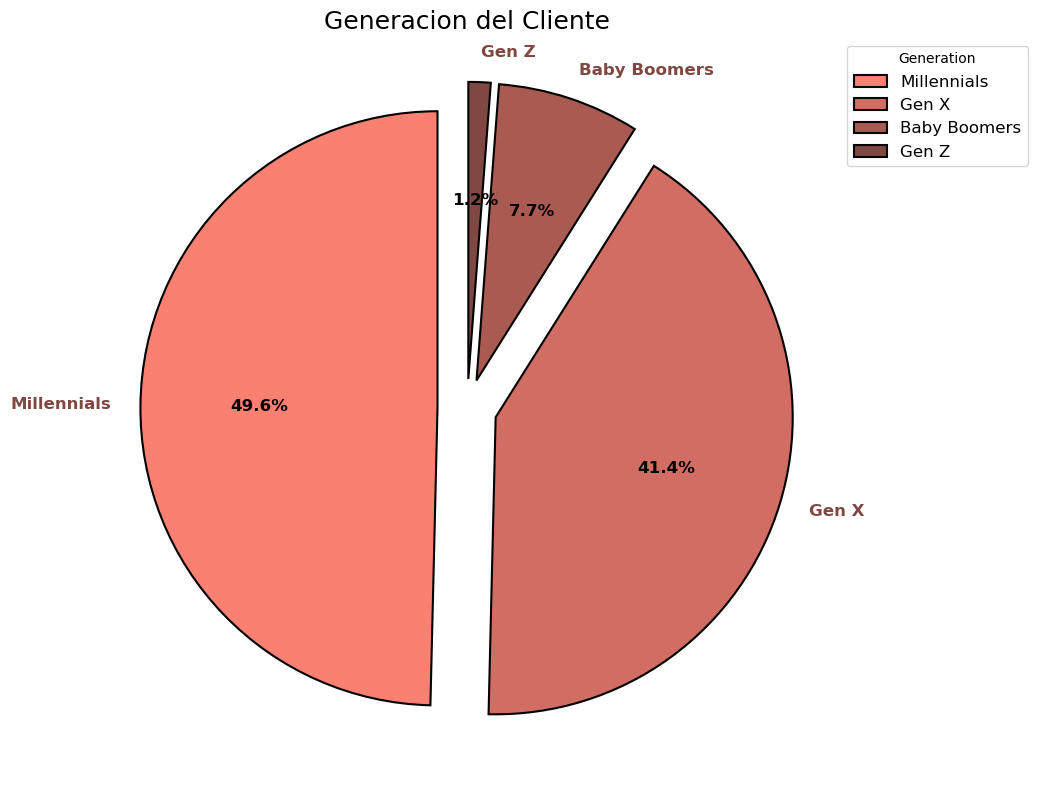

In [31]:
# Definición de la función para asignar la generación basada en la edad
def gen(x):
    if x <= 25:
        return 'Gen Z'
    elif (x > 25) & (x <= 41):
        return 'Millennials'
    elif (x > 41) & (x <= 57):
        return 'Gen X'
    else:
        return 'Baby Boomers'

# Creación del DataFrame para las generaciones
grupoedad = vuelo[['age']]
grupoedad['gen'] = grupoedad['age'].apply(gen)
generacioncliente = pd.DataFrame(grupoedad.groupby('gen').size().sort_values(ascending = False)).reset_index()
generacioncliente.columns = ['Generation', 'Count']

# Creo gráfico de pastel para las generaciones
plt.figure(figsize = (14, 8))
ax = plt.pie(x = generacioncliente['Count'], labels = generacioncliente['Generation'], explode = (0.1, 0.1, 0.1, 0.1), autopct = '%1.1f%%',
            colors=sns.color_palette("dark:salmon_r"), wedgeprops = {'linewidth': 1.5, 'edgecolor': 'black'},
            textprops = {'size': 'large', 'weight': 'bold'}, startangle = 90)

# Ajusto el color del texto para que coincida con el color del segmento
for i, patch in enumerate(ax[0]):
    ax[1][i].set_color(patch.get_facecolor())
plt.setp(ax[1], color = patch.get_facecolor())

# Añado título
plt.title("Generacion del Cliente", fontsize = 18)

# Añado leyenda
plt.legend(title = "Generation", loc = "upper left", bbox_to_anchor = (1, 1), fontsize = 'large')

# Ajusto el diseño para evitar superposiciones
plt.tight_layout()

# muestro el gráfico
plt.show()

**¿Qué Generación Viaja Más?**

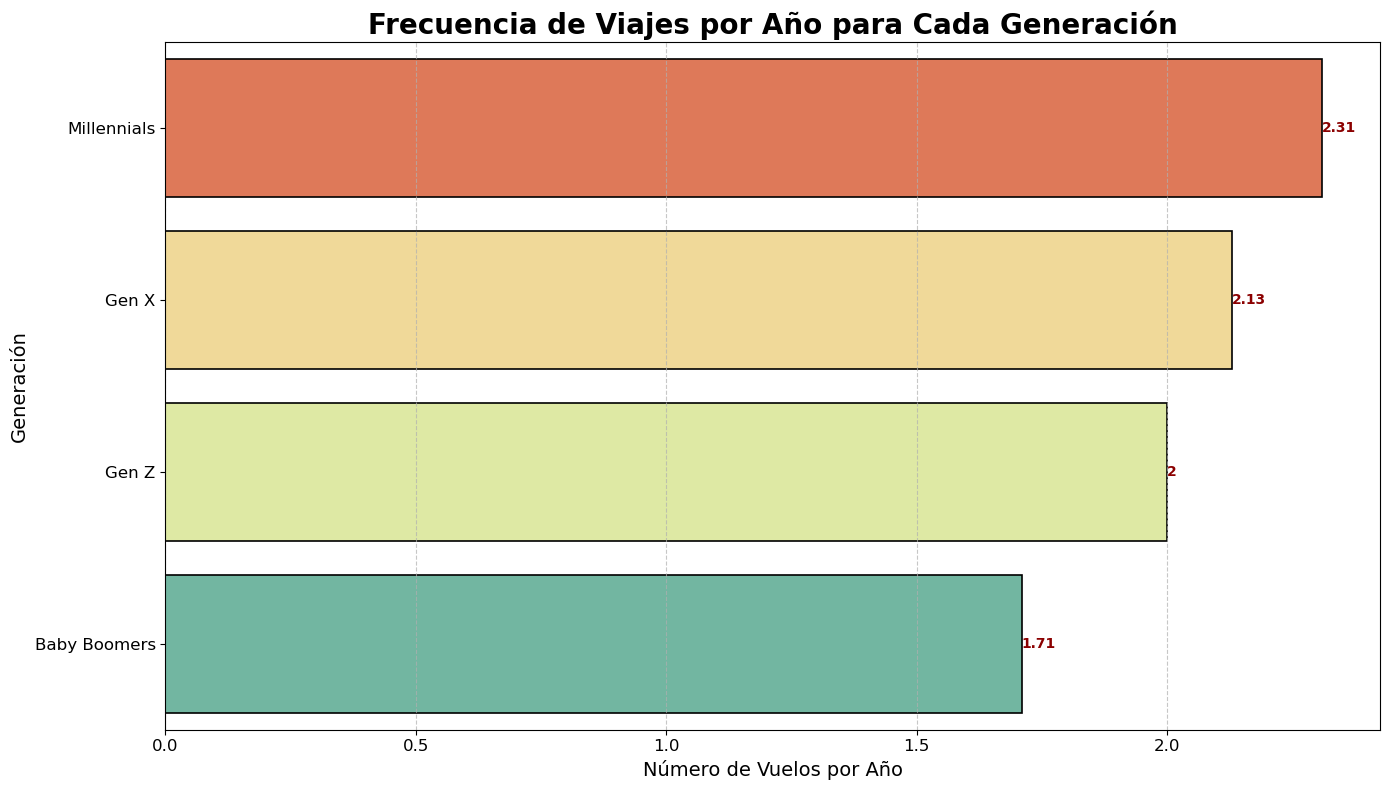

In [32]:
# Copio del DataFrame y Aplico la Función gen
generacioncliente2 = vuelo.copy()
generacioncliente2['gen'] = generacioncliente2['age'].apply(gen)

# Creo  la Feature L desde load_time and ffp_date column
from dateutil import relativedelta

def L(load_time, ffp_date):  # La función L calcula el tiempo en meses entre dos fechas (load_time y ffp_date).
    diff = relativedelta.relativedelta(load_time, ffp_date)
    diff_in_months = diff.months + diff.years * 12
    return diff_in_months
generacioncliente2['L'] = generacioncliente2.apply(lambda x: L(x['load_time'], x['ffp_date']), axis = 1) # Se añade una columna 'L' al DataFrame que contiene la diferencia en meses entre load_time y ffp_date para cada cliente.

# Cálculo de Métricas Adicionales
generacioncliente2['M/F(km)'] = generacioncliente2['seg_km_sum']/generacioncliente2['flight_count'] # Promedio de kilómetros recorridos por vuelo.
generacioncliente2['F/L (/yr)'] = generacioncliente2['flight_count']/(generacioncliente2['L']/12)   # frecuencia de vuelos por año, que se obtiene dividiendo el número de vuelos entre la duración en años.

#Agrupación por Generación y Cálculo de la Mediana
grupogencliente = pd.DataFrame(generacioncliente2.groupby('gen').agg({'F/L (/yr)':'median', 'M/F(km)':'median'}).sort_values('F/L (/yr)', ascending=False)).reset_index() #Se agrupa el DataFrame por generación ('gen') y se calculan las medianas de 'F/L (/yr)' y 'M/F(km)'
grupogencliente['F/L (/yr)'] = grupogencliente.apply(lambda x: round(x['F/L (/yr)'], 2), axis=1) #Se ordenan los resultados por la frecuencia de vuelos por año ('F/L (/yr)') de manera descendente.
grupogencliente

plt.figure(figsize = (14, 8))
ax = sns.barplot(x = "F/L (/yr)", y = "gen", data = grupogencliente, palette = "Spectral")

# Añado etiquetas de barra con color
plt.bar_label(ax.containers[0], color = 'darkred', fontweight = 'bold')

# Mejoro el aspecto del gráfico
plt.title('Frecuencia de Viajes por Año para Cada Generación', fontsize = 20, fontweight = 'bold')
plt.xlabel('Número de Vuelos por Año', fontsize = 14, color = 'black')
plt.ylabel('Generación', fontsize = 14, color = 'black')

# Mejoro la apariencia de las barras
for bar in ax.patches:
    bar.set_edgecolor('black')  # Añado borde a las barras
    bar.set_linewidth(1.2)      # Ajusto el grosor del borde

# Añado una rejilla horizontal para facilitar la lectura
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

# Ajusto el tamaño de la fuente de los ejes
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Muestro el gráfico
plt.tight_layout()
plt.show()

**FFP Tier**

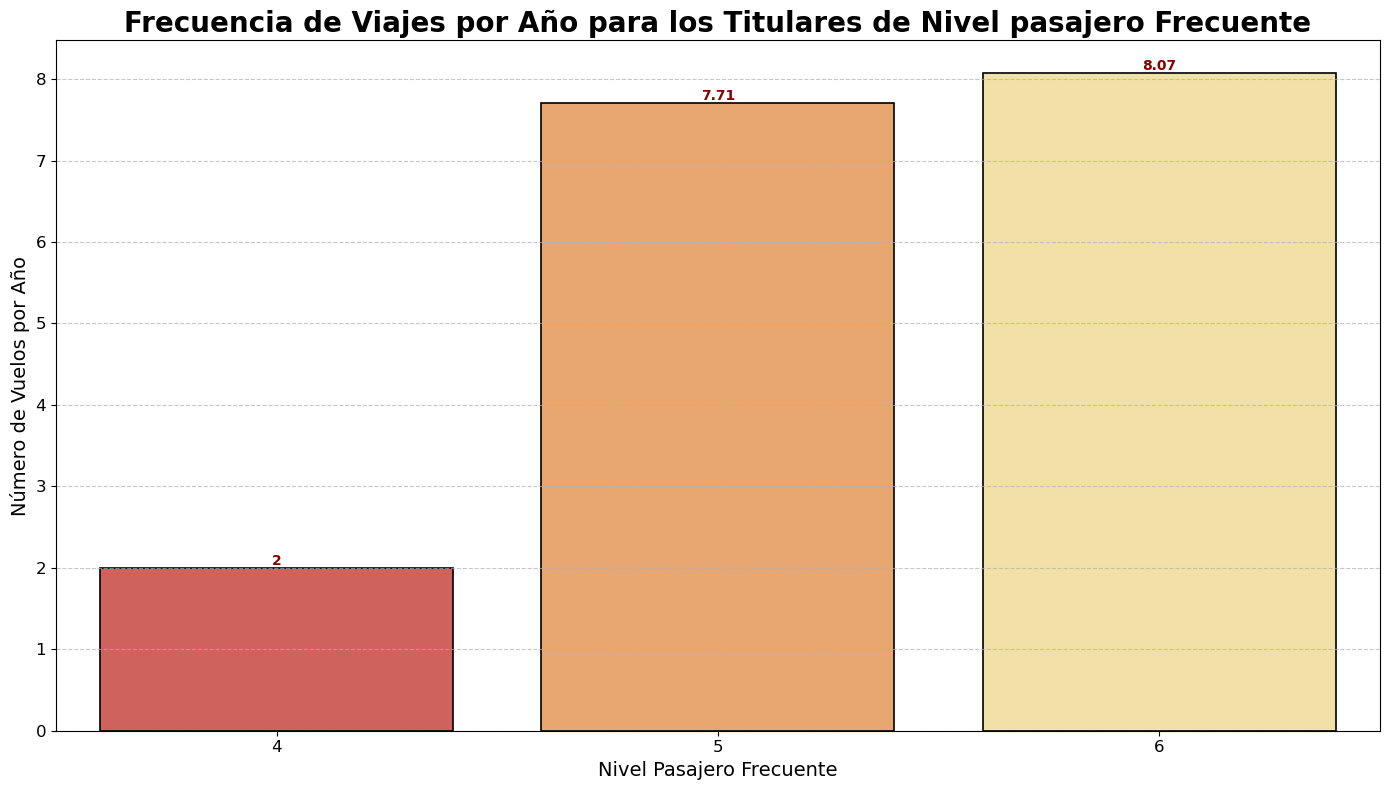

In [33]:
# Crear DataFrame para el grupo FFP
grupoffp = pd.DataFrame(generacioncliente2.groupby('ffp_tier').agg({'F/L (/yr)':'median', 'M/F(km)':'median'}).sort_values('F/L (/yr)', ascending=False)).reset_index()
grupoffp['F/L (/yr)'] = grupoffp.apply(lambda x: round(x['F/L (/yr)'], 2), axis=1)

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras
ax = sns.barplot(x = 'ffp_tier', y = 'F/L (/yr)', data=grupoffp, palette = sns.color_palette("Spectral"))

# Añadir etiquetas de barra con color
plt.bar_label(ax.containers[0], color = 'darkred', fontweight = 'bold')

# Mejorar el aspecto del gráfico
plt.title('Frecuencia de Viajes por Año para los Titulares de Nivel pasajero Frecuente', fontsize = 20, fontweight = 'bold')
plt.xlabel('Nivel Pasajero Frecuente', fontsize = 14, color = 'black')
plt.ylabel('Número de Vuelos por Año', fontsize = 14, color = 'black')

# Mejorar la apariencia de las barras
for bar in ax.patches:
    bar.set_edgecolor('black')  # Añadir borde a las barras
    bar.set_linewidth(1.2)      # Ajustar el grosor del borde

# Añadir una rejilla horizontal para facilitar la lectura
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Ajustar el tamaño de la fuente de los ejes
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

plt.show()

In [34]:
# Filtro el DataFrame generacioncliente2 para incluir solo las filas donde la frecuencia de vuelos por año ('F/L (/yr)') es mayor que 7 y 
# el nivel del programa FFP ('ffp_tier') es igual a 4.
generacioncliente2[(generacioncliente2['F/L (/yr)'] > 7) & (generacioncliente2['ffp_tier'] == 4)]

,id,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,gen,L,M/F(km),F/L (/yr)
114,60020,2012-06-07,2012-06-16,Female,4,LOS ANGELES,LA,US,49.0,2014-03-31,...,41.866667,150,0,0.753750,133754,1,Gen X,21,12232.000000,9.142857
133,59669,2012-04-11,2012-07-30,Male,4,dongguan,guangdong,CN,62.0,2014-03-31,...,42.461538,208,2,0.973673,179310,3,Baby Boomers,23,10336.285714,7.304348
258,13818,2010-04-25,2010-04-25,Male,4,guangzhou,guangdong,CN,54.0,2014-03-31,...,11.709091,60,3,0.995828,121166,8,Gen X,47,2042.107143,14.297872
269,39208,2010-08-28,2010-08-29,Male,4,NEYAGAWA,OSAKAFU,JP,48.0,2014-03-31,...,12.826923,76,8,0.828408,127389,14,Gen X,43,2540.132075,14.790698
275,4234,2009-08-07,2010-01-17,Male,4,guangzhou,guangdong,CN,37.0,2014-03-31,...,7.732558,49,3,0.962307,125094,9,Millennials,55,1323.379310,18.981818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50207,60939,2013-01-20,2013-03-31,Male,4,shantou,guangdong,CN,55.0,2014-03-31,...,42.875000,77,0,0.732222,2100,0,Gen X,14,413.000000,7.714286
50676,43542,2013-02-15,2013-04-21,Female,4,HK,HK,HK,38.0,2014-03-31,...,36.571429,126,0,0.357423,708,0,Millennials,13,927.500000,7.384615
51133,1850,2012-11-11,2013-05-04,Female,4,changsha,hunan,CN,24.0,2014-03-31,...,33.555556,62,0,0.381796,765,0,Gen Z,16,675.800000,7.500000
52295,25236,2012-11-15,2012-11-17,Male,4,fukang,xinjiang,CN,50.0,2014-03-31,...,41.416667,121,0,0.642308,3200,0,Gen X,16,289.000000,9.750000


5969 clientes deberían recibir una oferta para subir de nivel en el programa viajero frecuente de 4 a 5.

In [35]:
# Filtro el DataFrame generacioncliente2 para incluir solo las filas donde la frecuencia de vuelos por año ('F/L (/yr)') es mayor que 8 y 
# el nivel del programa FFP ('ffp_tier') es igual a 5.
generacioncliente2[(generacioncliente2['F/L (/yr)'] > 8) & (generacioncliente2['ffp_tier'] == 5)]

,id,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,gen,L,M/F(km),F/L (/yr)
8,32197,2011-06-07,2011-07-01,Male,5,DRANCY,Unknown,FR,50.0,2014-03-31,...,13.054545,94,5,0.828478,295158,7,Gen X,33,5740.875000,20.363636
24,58472,2010-02-14,2010-03-01,Female,5,Unknown,Unknown,FR,48.0,2014-03-31,...,15.883721,66,10,0.787308,235939,12,Gen X,49,6405.386364,10.775510
43,58798,2010-05-04,2010-05-14,Male,5,guangzhou,guangdong,CN,51.0,2014-03-31,...,15.888889,54,0,0.764737,191878,2,Gen X,46,5581.869565,12.000000
49,22629,2010-07-15,2010-07-15,Male,5,SUMIDA-KU,TOKYO-TO,JP,49.0,2014-03-31,...,6.028986,32,8,0.863479,199386,9,Gen X,44,3132.600000,19.090909
59,11034,2005-01-26,2005-03-09,Male,5,beijing,.,CN,59.0,2014-03-31,...,9.133333,34,5,0.819187,190530,13,Baby Boomers,110,2827.907895,8.290909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28926,43384,2013-01-01,2013-01-06,Male,5,wuhan,hubei,CN,47.0,2014-03-31,...,21.947368,108,0,0.750780,8825,1,Gen X,14,524.150000,17.142857
29532,51635,2012-07-22,2012-07-22,Male,5,.,beijing,CN,38.0,2014-03-31,...,40.466667,189,0,0.790090,6738,0,Millennials,20,605.500000,9.600000
35936,6607,2012-06-12,2012-06-19,Male,5,guangzhou,guangdong,CN,48.0,2014-03-31,...,39.000000,232,0,0.624000,3926,0,Gen X,21,604.000000,8.571429
40073,6343,2012-05-22,2012-05-24,Male,5,yining,wulumuqi,CN,43.0,2014-03-31,...,47.785714,468,0,0.586195,4400,1,Gen X,22,527.266667,8.181818


1625 clientes deberían recibir una oferta para subir de nivel en el programa FFP de 5 a 6.

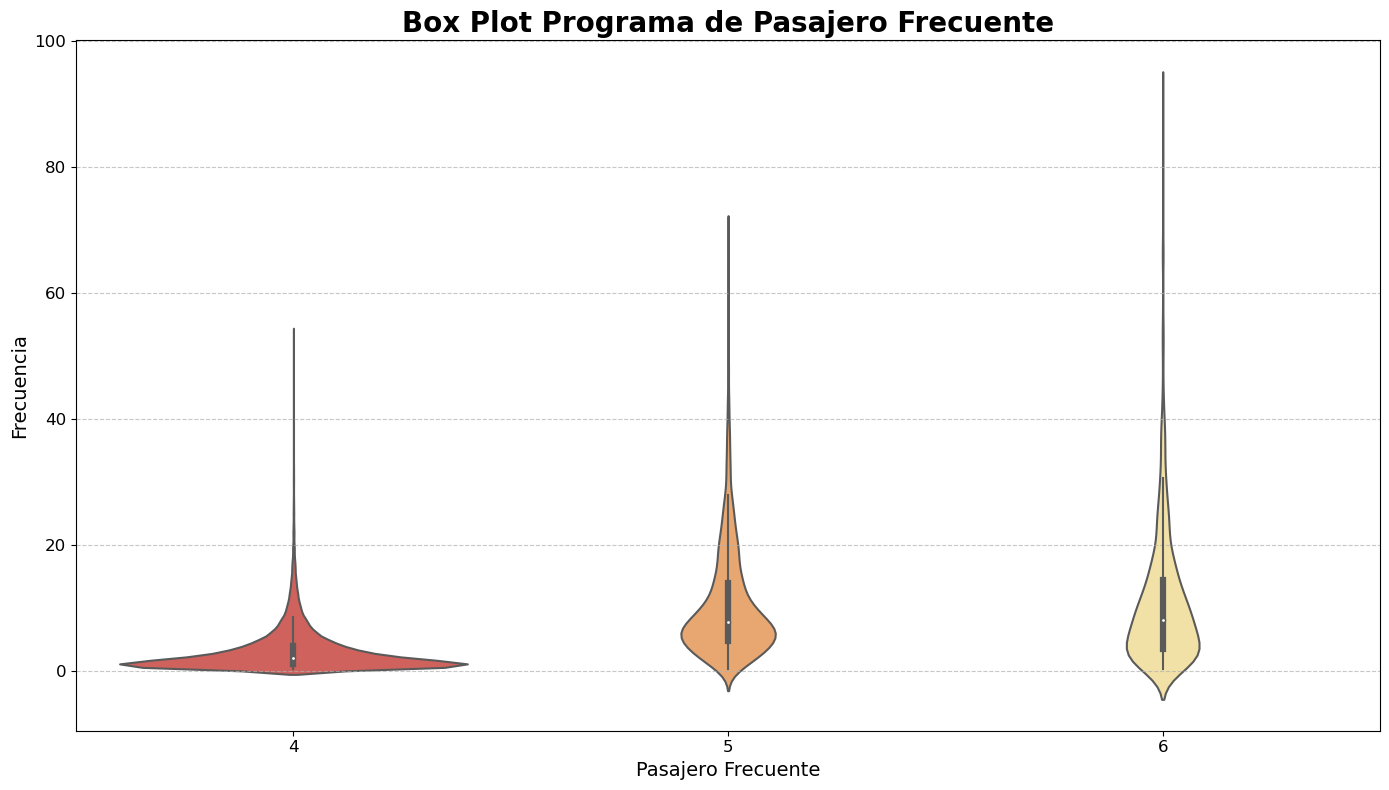

In [36]:
plt.figure(figsize = (14, 8))
ax = sns.violinplot(data = generacioncliente2, x = 'ffp_tier', y = 'F/L (/yr)', palette = sns.color_palette("Spectral"))

# Mejoro el aspecto del gráfico
plt.title('Box Plot Programa de Pasajero Frecuente', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pasajero Frecuente', fontsize = 14, color = 'black')
plt.ylabel('Frecuencia', fontsize = 14, color = 'black')

# Añado una rejilla horizontal para facilitar la lectura
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Ajusto el tamaño de la fuente de los ejes
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Ajusto el diseño para evitar superposiciones
plt.tight_layout()

plt.show()

## 3.Preprocesamiento de Datos.

In [37]:
# Copio el Dataset
df = vuelo.copy()
df.head()

,id,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,Unknown,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


### 3.1. Seleccion de caracteristicas

El modelo LRFMC es una variación del popular modelo RFM (Recency, Frequency, Monetary) utilizado para analizar el valor del cliente en diversas industrias, incluida la aviación. El modelo LRFMC agrega dos componentes adicionales (Loyalty y Frequency) específicos para la industria de las aerolíneas, lo que lo hace más adecuado para analizar el valor del cliente en este contexto. A continuación se describen los componentes del modelo LRFMC:

	1.	Loyalty (L): Representa la lealtad del cliente hacia la aerolínea. Se mide a menudo por la cantidad de tiempo que el cliente ha sido miembro del programa de viajero frecuente (FFP Date) y el número de vuelos realizados.
	2.	Recency (R): Indica cuán recientemente el cliente ha realizado un vuelo con la aerolínea. Este componente es importante porque los clientes que han volado recientemente son más propensos a volar nuevamente en el futuro cercano.
	3.	Frequency (F): Mide la frecuencia con la que el cliente viaja con la aerolínea. Los clientes que vuelan con frecuencia suelen ser más valiosos, ya que generan más ingresos y muestran un mayor nivel de compromiso con la aerolínea.
	4.	Monetary (M): Representa el valor monetario que el cliente aporta a la aerolínea. Se mide generalmente a través del gasto total del cliente o los ingresos generados a partir de sus vuelos.
	5.	Customer (C): En este contexto, puede referirse a métricas adicionales específicas del cliente, como el descuento promedio recibido (AVG DISCOUNT), la distancia total volada (SEG KM SUM) y el tiempo desde el último vuelo hasta el final del período de análisis (LAST TO END).

Aplicación en la Industria de las Aerolíneas

El modelo LRFMC permite a las aerolíneas segmentar a sus clientes en diferentes grupos basados en su valor y comportamiento, lo cual es crucial para desarrollar estrategias de marketing más efectivas y personalizadas. Por ejemplo:

	•	Clientes Leales: Clientes con alta lealtad y frecuencia. Las aerolíneas pueden ofrecerles beneficios exclusivos y programas de recompensas para mantener su lealtad.
	•	Clientes Nuevos: Clientes con alta recencia pero baja frecuencia. Las aerolíneas pueden centrarse en aumentar su frecuencia mediante promociones y ofertas especiales.
	•	Clientes Inactivos: Clientes con baja recencia. Las aerolíneas pueden intentar reactivar a estos clientes mediante campañas de marketing dirigidas.

Ejemplo de Uso de los Atributos Seleccionados

Para aplicar el modelo LRFMC, se seleccionan seis atributos clave:

	•	FFP DATE: Fecha de inscripción en el programa de viajero frecuente, que indica la lealtad del cliente.
	•	LOAD_TIME: Fecha de carga de los datos, utilizada para calcular la recencia.
	•	FLIGHT COUNT: Número total de vuelos realizados, que mide la frecuencia.
	•	AVG DISCOUNT: Descuento promedio recibido, que puede influir en el valor monetario.
	•	SEG KM SUM: Distancia total volada, que también contribuye al valor monetario.
	•	LAST TO END: Tiempo desde el último vuelo hasta el final del período de análisis, utilizado para calcular la recencia.

El análisis de estos atributos permite a las aerolíneas comprender mejor el comportamiento y el valor de sus clientes, y diseñar estrategias específicas para maximizar la lealtad y la rentabilidad.

In [38]:
# solo incluyo la seleccion de caracteristicas
df = df[['ffp_date', 'load_time', 'flight_count', 'avg_discount', 'seg_km_sum', 'last_to_end']]
df.head()

,ffp_date,load_time,flight_count,avg_discount,seg_km_sum,last_to_end
0,2006-11-02,2014-03-31,210,0.961639,580717,1
1,2007-02-19,2014-03-31,140,1.252314,293678,7
2,2007-02-01,2014-03-31,135,1.254676,283712,11
3,2008-08-22,2014-03-31,23,1.090870,281336,97
4,2009-04-10,2014-03-31,152,0.970658,309928,5


### 3.2. Ingeniería de Características

Dado que los datos originales no proporcionan directamente los cinco indicadores del modelo LRFMC, es necesario extraer estos indicadores de los datos originales. El método de cálculo específico es el siguiente:

	•	Lealtad = LOAD_TIME - FFP DATEv El número de meses entre el momento de la membresía y el final del período de observación = el final del período de observación - el momento de la membresía (unidad: meses). Cuanto mayor sea el valor de lealtad, mejor será, y viceversa.
	•	Recencia = LAST TO END El número de meses desde la última vez que el cliente tomó el avión de la compañía hasta el final del período de observación = el tiempo desde el último vuelo hasta el final del período de observación (unidad: meses). Cuanto menor sea el valor de recencia, mejor será, y viceversa.
	•	Frecuencia = FLIGHT COUNT Número de veces que el cliente toma el avión de la compañía en el período de observación = número de vuelos en el período de observación (unidad: veces). Cuanto mayor sea el valor de frecuencia, mejor será, y viceversa.
	•	Monetario = KM_SEG_SUM Historia de vuelos acumulada del cliente durante el tiempo de observación = kilómetros totales de vuelo durante el período de observación (unidad: km). Cuanto mayor sea el valor monetario, mejor será, y viceversa.
	•	Cabina = AVG DISCOUNT Valor promedio del coeficiente de descuento correspondiente al espacio del pasajero durante el tiempo de observación = tasa promedio de descuento (unidad: ninguno). Cuanto mayor sea el valor de cabina, mejor será, y viceversa.

In [39]:
# Creo la característica L a partir de las columnas load_time y ffp_date
from dateutil import relativedelta

# obtengo el intervalo entre dos fechas
def L(load_time, ffp_date):
    diff = relativedelta.relativedelta(load_time, ffp_date)
    diff_in_months = diff.months + diff.years * 12
    return diff_in_months

df['L'] = df.apply(lambda x: L(x['load_time'], x['ffp_date']), axis = 1)

In [40]:
# renombro columnas
df.rename(columns = {'L':'Lealtad', 'last_to_end':'Recencia', 'flight_count':'Frecuencia', 'seg_km_sum':'Monetaria', 'avg_discount':'Cabina'}, inplace = True)

# Elimino load_time y ffp_date
df = df.drop(columns = ['load_time', 'ffp_date'])

# reordeno Columnas
df = df[['Lealtad', 'Recencia', 'Frecuencia', 'Monetaria', 'Cabina']]

In [41]:
df.head()

,Lealtad,Recencia,Frecuencia,Monetaria,Cabina
0,88,1,210,580717,0.961639
1,85,7,140,293678,1.252314
2,85,11,135,283712,1.254676
3,67,97,23,281336,1.090870
4,59,5,152,309928,0.970658


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lealtad,61856.0,48.265714,27.819575,12.0,24.00000,41.000000,71.000000,112.0
Recencia,61856.0,172.606942,181.234370,1.0,29.00000,105.000000,260.000000,731.0
Frecuencia,61856.0,11.964401,14.116064,2.0,3.00000,7.000000,15.000000,213.0
Monetaria,61856.0,17303.810027,21040.271177,368.0,4866.75000,10183.000000,21497.500000,580717.0
Cabina,61856.0,0.721649,0.184792,0.0,0.61265,0.711827,0.808825,1.5


In [43]:
df.columns

Index(['Lealtad', 'Recencia', 'Frecuencia', 'Monetaria', 'Cabina'], dtype='object')

**plot de Distribucion**

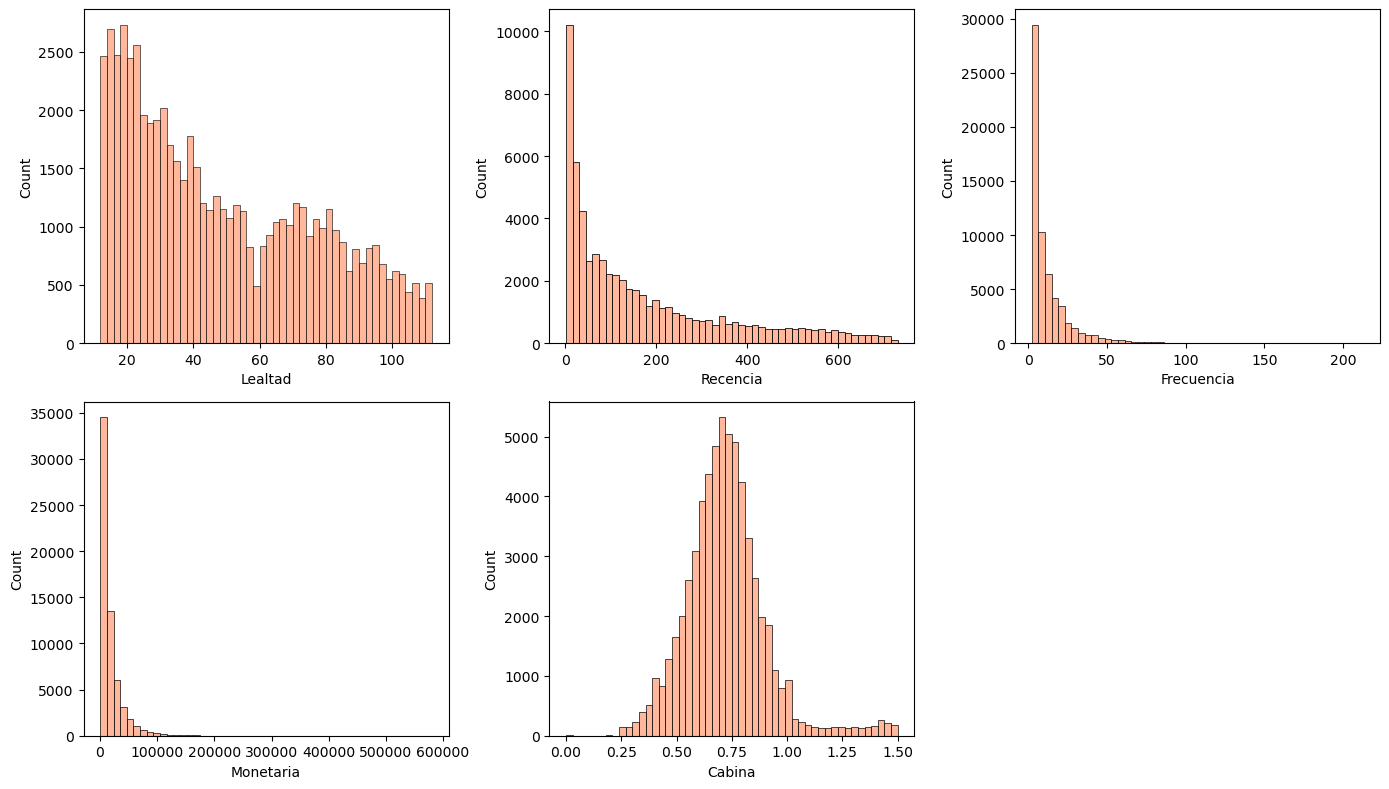

In [44]:
#dibujo grafico de distribucion
plt.figure(figsize=(14, 8))

for i in range(len(df.columns)):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=df.columns[i], color='lightsalmon', bins=50)
    plt.xlabel(df.columns[i])
    plt.tight_layout()


**Box Plot para detectar Outliers** 

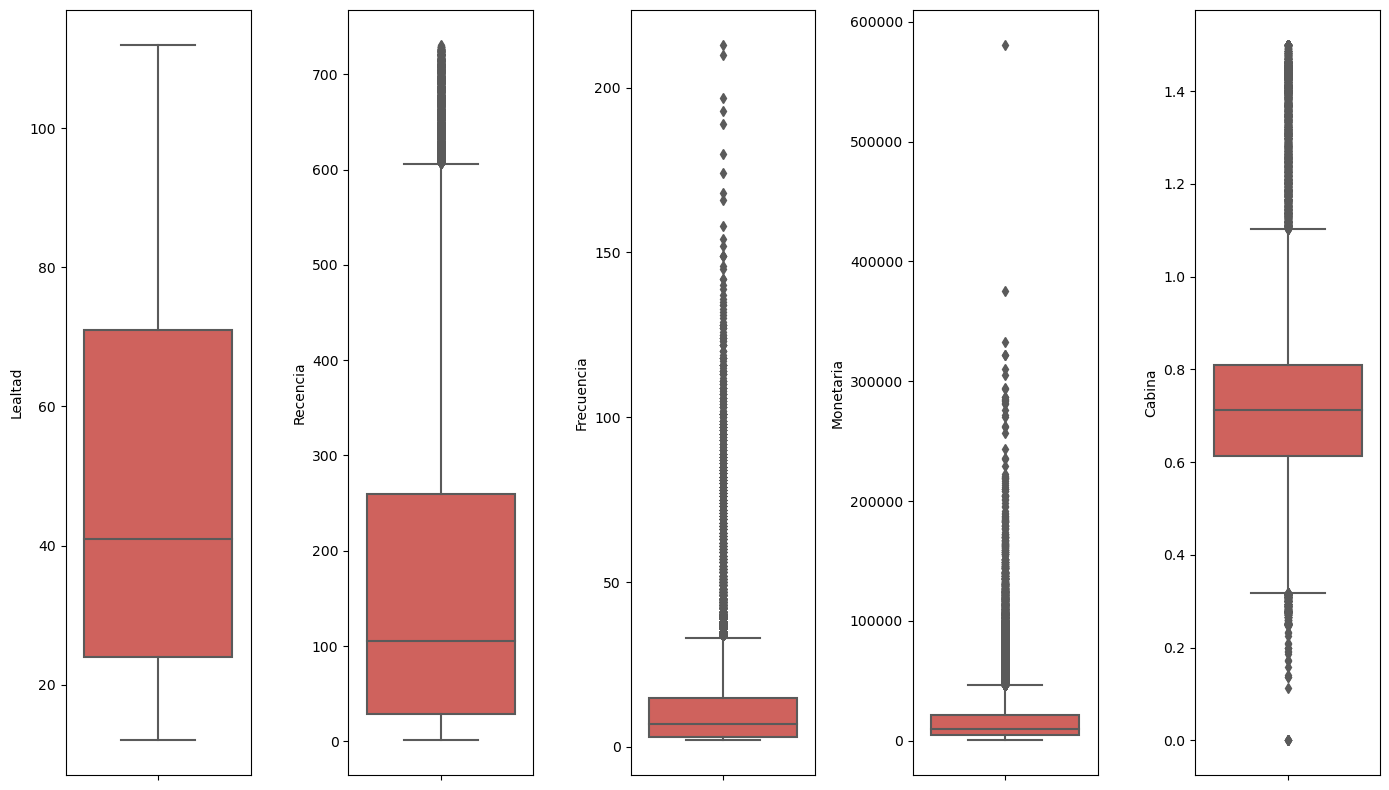

In [45]:
plt.figure(figsize=(14, 8))

for i in range(len(df.columns)):
    plt.subplot(1, len(df.columns), i+1)
    sns.boxplot(y=df[df.columns[i]], palette=sns.color_palette("Spectral"))
    plt.tight_layout()


Sólo la columna Lealtad no tiene outliers en ella. Las otras columnas tienen muchos outliers que contaremos en relación con su significancia hacia los datos.

### 3.3. Manejo de Outliers

Dado que el K-Means Clustering es sensible al rango de los datos, debemos manejar los outliers de manera sabia para optimizar nuestro proceso de modelado y mejorar los resultados. Aquí vamos a inspeccionar los outliers en cada columna.

** Porcentaje de Outliers **

In [46]:
#cuento los  outliers para cada columna
def find_outliers_IQR(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    outliers = df[col][((df[col]<(q1-1.5*IQR)) | (df[col]>(q3+1.5*IQR)))]
    return outliers

for i in range(len(df.columns)):
    outliers = find_outliers_IQR(df, df.columns[i])
    outliers_pct = len(outliers)/len(df[df.columns[i]]) * 100
    print(f'El porcentaje de outliers por columnas {df.columns[i]} es ', outliers_pct)

El porcentaje de outliers por columnas Lealtad es  0.0
El porcentaje de outliers por columnas Recencia es  3.493598034143818
El porcentaje de outliers por columnas Frecuencia es  6.935463010863942
El porcentaje de outliers por columnas Monetaria es  7.595059493016038
El porcentaje de outliers por columnas Cabina es  4.125711329539575


**Reemplazar con el percentil décimo y el percentil nonagésimo**

In [47]:
df_out = df.copy()

# Reemplazo los  outliers
def reemplazo_outliers(df, col):
    # Computando 10th, 90th percentiles
    decimo_percentile = np.percentile(df[col], 10)
    nonagesimo_percentile = np.percentile(df[col], 90)
    b = np.where(df[col] < decimo_percentile, decimo_percentile, df[col])
    b = np.where(b > nonagesimo_percentile, nonagesimo_percentile, b)
    return b

col = ['Recencia', 'Frecuencia', 'Monetaria', 'Cabina']
for i in range(len(col)):
    df_out[col[i]] = reemplazo_outliers(df_out, col[i])

df_out.head()

,Lealtad,Recencia,Frecuencia,Monetaria,Cabina
0,88,8.0,28.0,40030.5,0.92
1,85,8.0,28.0,40030.5,0.92
2,85,11.0,28.0,40030.5,0.92
3,67,97.0,23.0,40030.5,0.92
4,59,8.0,28.0,40030.5,0.92


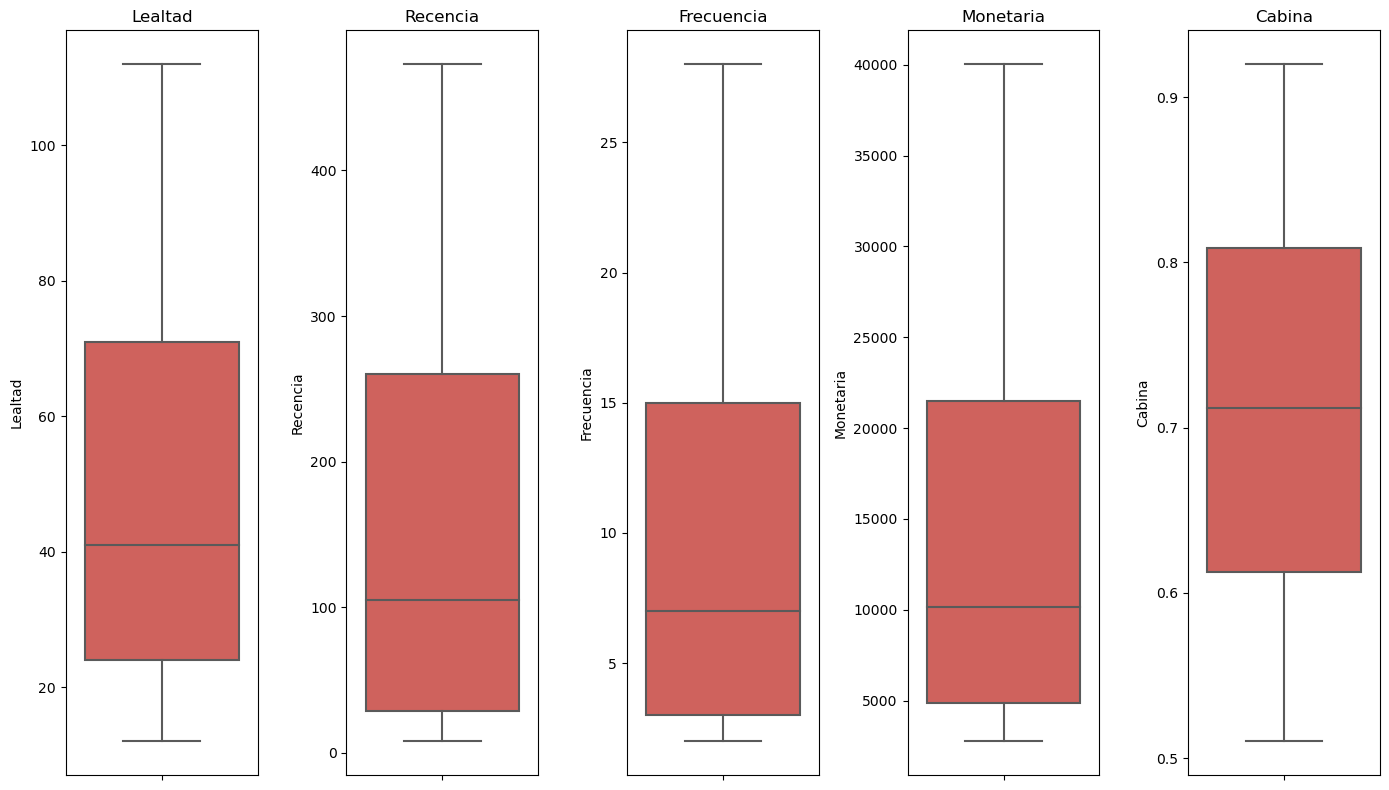

In [48]:
plt.figure(figsize=(14, 8))

for i in range(len(df_out.columns)):
    plt.subplot(1, len(df_out.columns), i+1)
    sns.boxplot(y=df_out[df_out.columns[i]], palette=sns.color_palette("Spectral"))
    plt.title(df_out.columns[i])
    plt.tight_layout()

plt.show()

### 3.3.  Escalado de Características con Puntuación LRFMC

Evaluación utilizando una escala de 1 a 5. Para los indicadores de Lealtad, Frecuencia, Monetario y Cabina, cuanto mayor sea el valor, mayor será la puntuación que obtengan, y viceversa. Para la Recencia, cuanto menor sea el valor, mayor será la puntuación que obtengan, y viceversa. La puntuación se basará en quintiles.

In [49]:
# Copio el dataset
df_score = df_out.copy()

# Puntaje
for col in df_score.columns:
    df_score[col]= pd.qcut(df_score[col], q = 5, labels = False) + 1

# Puntaje para la columna de recencia
dict_map = {1:5, 2:4, 3:3, 4:2, 5:1}
df_score['Recencia'] = df_score['Recencia'].map(dict_map)

df_score.head()

,Lealtad,Recencia,Frecuencia,Monetaria,Cabina
0,5,5,5,5,5
1,5,5,5,5,5
2,5,5,5,5,5
3,4,3,5,5,5
4,4,5,5,5,5


**Grafico de Correlacion**

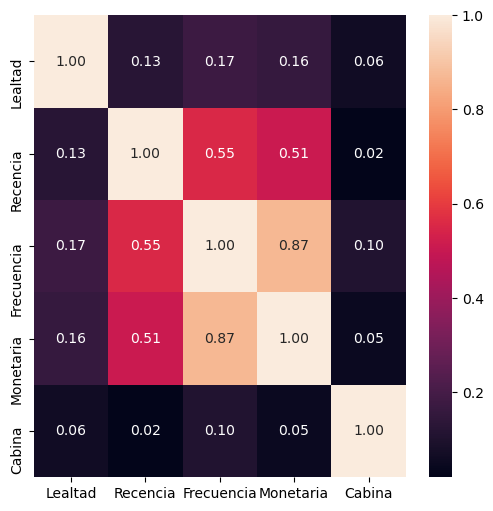

In [50]:
# heatmap Grafico de Correlacion
corr = df_score.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

La característica F (Frecuencia) y M (Monetario) están altamente correlacionadas, lo cual tiene sentido. Cuanto más frecuentemente vuela un cliente, mayor será la distancia total de vuelo.

## 5. Conclusion y Recomendacion

**La segmentación nos ayuda a ser más eficientes en términos de tiempo, dinero y otros recursos. La segmentación de clientes nos permite conocer mejor a nuestros clientes. Podemos obtener una mejor comprensión del comportamiento del cliente y, por lo tanto, adaptar las campañas a los segmentos de clientes que tienen más probabilidades de comprar nuestros productos.

Aquí utilizamos K-Means, el algoritmo de agrupamiento en aprendizaje automático más popular, para representar mejor cada grupo de clientes. Nos basamos en el modelo LRFMC, destacando el aspecto comportamental de los clientes en términos de Lealtad (duración de la relación), Recencia (última compra), Frecuencia (frecuencia de compra), Monetario (valor de compra) y Cabina (nivel de compra/clase de vuelo).**

### 5.1. Conclusion

	•	El 91.71% de los clientes provienen de China, seguidos por sus vecinos: Hong Kong, Corea del Sur y Japón.
	•	La mayoría de los clientes son hombres, lo que representa el 76.5%.
	•	Se ofrecen tres niveles de FFP (Programa de Pasajeros Frecuentes): del nivel 4 al 6. El 92.1% de los clientes tienen el nivel 4 de FFP.
	•	La mayoría de los clientes tienen entre 35 y 45 años.
	•	Hay 5 segmentos de clientes (de izquierda a derecha): Leal - Alto Prospecto - Bajo Consumidor - VIP en Hibernación - Perdido e Incierto.
	•	Basado en la proporción total de clientes:
	•	Los clientes de alto valor representan alrededor del 55%.
	•	Los clientes leales representan el 40%, mientras que el 60% son miembros relativamente nuevos.


